<div  style="color:black; width: 100%; background: linear-gradient(to right , #174ca9, #4472c4, #174ca9 ) no-repeat left top; border-bottom:6px solid #4caf4f; position: relative;"> 
    <div style="color:#fff; line-height:54px;font-size:30px;padding-top:15px; text-align: center; font-weight: bold; ">金融科技II - 量化交易过程</div>
<div style="color:#fff;font-size:20px; font-weight: bold; padding-top:20x; text-align: center;">多因子α策略</div>
<div style=" text-align: center; color:rgba(255,255,255,.8); padding-top:15px; padding-bottom:20px;">西南财经大学 陈春林 黄辰</div>
</div>

# 第八章 多因子$\alpha$策略

## 8.1 第六章回顾

在6.2中，我们举了一个简单的例子，讲述了如何使用Python来写一个小程序，构造了一个“红三兵”的模型，用以预测股票收益，并检验了其预测能力。这样，它就可以称为我们多因子$\alpha$策略的一部分了。

然而，在第六章中，我们的程序是非常简陋的，充其量相当于上世纪90年代初期国外的水平。在本章中，我们将用更加严谨的手段，一步一步完成多因子$\alpha$策略。这样，我们就能接近国内外当下的先进水平了。


## 8.2 第七章回顾

在7.1.2中，我们简要介绍了本策略。这里，我们扩充并梳理一下策略主干：

1. 我们先要寻找一些预测因子，这些预测因子可以在一定程度上预测每只股票的收益率。
2. 我们要检验这些因子的预测力强弱，并对原始预测进行处理，尽可能地去粗取精，去掉噪音保留信息，得出精炼预测。
3. 处理截面预测和时间序列预测的不同。
4. 考虑到这些预测会衰减，所以我们要将精炼预测在时间维度上进行组合。
5. 建立风险模型，研究股票之间的协防差矩阵。
6. 对不同的预测进行组合，结合协防差矩阵计算最优持仓。

## 8.3 精炼预测

### 8.3.1 讨论：怎样的收益率预测模型是好的模型？

我们一再强调，收益率预测更接近艺术。但我们还是要讨论一下，怎样的收益率预测模型是好的模型。
为更接近问题的核心，我们就上一章的例子，提出下列问题。

#### 8.3.1.1 问题一：

我们先来思考第一个问题：我们把出现“红三兵”时，记它的预期收益率为1%，未出现时记为0，
那么，这个1%是怎么算出来的？
要解决这个问题很简单，我们把过去出现“红三兵”之后，股票第二天的收益率记录下来，求个均值即可。

#### 8.3.1.2 问题二：

那么问题又来了，我们是在做主动管理，所有预测都是基于一致预期收益的，
即我们要预测的是超出一致预期的收益，这个和我们学过的超额收益不同，我们姑且将其叫做超常收益。
这样，刚才的算法可能就需要调整一些，应该记录每次“红三兵”之后的超常收益，然后求个均值。

#### 8.3.1.3 问题三：

问题又来了，对于不同股票，出现“红三兵”之后的超常收益，可能分布不同——
有些股票可能超常收益的标准差大，有些股票可能超常收益的标准差小，这又怎么办呢？
一般来说，我们很会把其中$\beta$的成分去掉，高$\beta$的股票自然超常收益的标准差大，
我们去掉这个因素后，各股票的超常收益分布接近多了。

#### 8.3.1.4 问题四：

自然，还有新的问题：不同行业的股票，大概也有上述不同吧。
这个要处理就太复杂了，但也可以用类似的方法处理。

#### 8.3.1.5 问题五：

再来看，在牛市中，如果所有股票都出现“红三兵”，
那么出现“红三兵”的股票就并不比指数走得好，这个不合逻辑。
解决方案通常是：如果一共有N只股票，其中m只出现“红三兵”，
那么出现“红三兵”的，预测超常收益率为(N - m)%，未出现的为m%，
这样，倒是实现了平衡，但还要按照刚才计算的超常收益的标准差来标准化一下。

#### 8.3.1.6 问题六：

再来想一个问题，既然“红三兵”能赚钱，那对称地，“绿三兵”呢？
在股票市场上，这个往往要谨慎，因为我国做空机制不够完善，涨跌并不对称。
那是不是大宗商品的期货市场上，就可以对称来做呢？
期货市场上，做短期波动的策略，可以假设涨跌是对称的。
但如果做长期策略，则并不然，大宗商品的需求的增减，往往变动比较慢，
几乎可以认为是不变的，供给方面，如果供给过剩，
在整个产业链上，了解信息的人是相当多的，
而且对过剩供给的消耗也是非常持久的，故熊市一半比较长。
而如果供给是短缺的，那么往往各种天灾人祸意外事故都会导致价格暴涨，
所以商品牛市往往也比较短暂。
这就意味着，大宗商品的长期涨跌也是不对称的。
所以，我们要根据情况，判断要不要把“红三兵”和“绿三兵”融和成一个信号。

#### 8.3.1.7 问题七：

那么问题又来了，怎么判断“红三兵”是否有效呢？
我们可以把出现“红三兵”的股票选出来，持有20天，看看收益。

#### 8.3.1.8 问题八：

但是这样又引入了新的问题，我为什么是持有20天而不是持有30天？
索性，干脆只持有1天？或者再加入点止损条件？这样就更复杂了。
我们要研究这个入场点好不好，就应该控制变量，根本不要引入任何出场参数。
所以，我们就考察持有1天。

#### 8.3.1.9 问题九：

那么，我们考察持有1天的什么？超常收益？夏普比？信息比？收益回撤比？胜率？
另外，因为前面的讨论，每次出现“红三兵”时，我们对未来的预测都不同了。
那么，对于一个连续的预测，怎么评价预测准不准？
最简单的做法是计算预测和实现的超常收益的相关系数。

#### 8.3.1.10 问题十：

那问题又来了，相关系数也有好多种算法。
其核心在于，我预测的2%和预测的1%，事实上可能并不是2倍的关系。
那么，是否应该按某种方式再次将预测标准化呢？是，读者可以想想该怎么做。

#### 8.3.1.11 问题十一：

接下来，我们回到为什么只考察1天这个问题。
我们先思考一下，如果今天出现“红三兵”，
我买了后一直持有，次日的平均收益、第三日的的平均收益、第n日的平均收益，
是否会有一定的数学关系？
很显然，它会衰减，但怎么衰减？
一种合理的想法是指数衰减，因为指数衰减有无记忆性，并且只有一个参数。
如果是这样，我只需要考察第1天和第2天，一方面求出上述参数，
一方面求出首日的预测收益，那后面的收益都能推出来了。
但事实上，通过历史数据研究发现，它并非完全的指数衰减，
这里面可研究的东西很多。

#### 8.3.1.12 问题十二：

再有，如果短期内连续出现两次“红三兵”，预测收益是否加倍？
这就要考虑到红三兵这个信号本身的自相关性了。
如果自相关性高，预测收益大体应该是不变的；
如果自相关性低，那么预测收益翻倍好像也没什么问题。
这自相关性究竟如何影响，也有很多可以研究的东西。

#### 8.3.1.13 结论：

以上，我们提出了很多问题。我们可以很确定的说，没考虑这些问题的预测，
一定不是好的预测。全部考虑了这些问题的预测，也难说孰优孰劣。
这就真的进入艺术的领域了。

本章，我们将一起，直面上述问题，采用业界通行的办法来精炼预测。
我们将采用第二章所找到的预测因子——“红三兵”，将其预测进行精炼。

### 8.3.2 基础知识回顾

我们上一章中提到的预测——“红三兵”实际上是我们获取信息的原始形式。
由于原始的信息千奇百怪，我们无法把它和其他信息结合起来使用，也无法把它直接用于对收益率的预测。
在本章中，我们会把原始预测转化为精炼预测，它与我们要预测的收益率具有相同的单位和量级，
具有相似的统计特性，尽可能地暴露出原始预测中所含有地信息量。

经过严格地数学推导，我们可以得到基于预测而对主动收益率的最小方差无偏估计：
$$\alpha = \mathbf{Cov}[r, g] \cdot \mathbf{Var}^{-1}[g] \cdot (g - \mathbf{E}[g])$$
其中，r是预测标的的主动收益率，g是我们的原始预测。

然后，我们经过不那么严谨的简化，可以得到简化表达式，也就是我们在本章中的核心脉络：
$$\alpha = \omega \cdot IC \cdot z$$
其中$\omega$是标的主动收益率的标准差，IC是信息系数，定义为原始预测和标的主动收益率的相关系数，z是原始预测的标准化形式，均值为0，标准差为1。

下面，我们将以此为脉络开展我们的实验，以求出精炼预测$\alpha$。

### 8.3.3 操作总览

本实验由以下几个步骤组成：
1. 步骤一：重构并优化“红三兵”
2. 步骤二：信号标准化
3. 步骤三：计算信息系数IC
4. 步骤四：计算精炼预测$\alpha$

### 8.3.4 操作流程

#### 8.3.4.0 准备工作

我们每一节的代码都是可以独立运行的，所以在开始之前，我们需要做一些准备工作：



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import tushare as ts

在获取股票数据时，我们采用TuShare提供的最新的方法：

In [2]:
stock_list = ts.get_sz50s().code
stock_list = stock_list[stock_list != '601236']
stock_data = {}
for stock in stock_list:
    stock_data[stock] = ts.get_k_data(stock, start='2017-01-01', end='2017-12-31')
stock_data['600000'].head()

/opt/conda/lib/python3.7/site-packages/tushare/stock/classifying.py:266: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


,date,open,close,high,low,volume,code
0,2017-01-03,12.184,12.251,12.356,12.153,162371.0,600000
1,2017-01-04,12.244,12.274,12.289,12.161,296587.0,600000
2,2017-01-05,12.251,12.251,12.311,12.206,264376.0,600000
3,2017-01-06,12.251,12.161,12.251,12.123,171955.0,600000
4,2017-01-09,12.206,12.176,12.244,12.123,149087.0,600000


同样的，我们获取上证50指数（000016）的数据：

In [3]:
index_name = '000016'
index_data = ts.get_k_data(index_name, index=True, start='2017-01-01', end='2017-12-31')
print(index_data.head())
print(len(index_data))

         date     open    close     high      low      volume      code
0  2017-01-03  2285.27  2307.89  2311.29  2285.27  25908920.0  sh000016
1  2017-01-04  2305.91  2322.21  2324.56  2304.17  26104403.0  sh000016
2  2017-01-05  2322.42  2322.68  2326.18  2317.89  26528712.0  sh000016
3  2017-01-06  2323.01  2308.94  2326.43  2308.37  26445124.0  sh000016
4  2017-01-09  2308.44  2318.34  2321.69  2307.16  26523074.0  sh000016
244


我们把所有股票的开盘价，做在一个DataFrame里，最高价、最低价、收盘价等同理，这样可以方便我们计算并增加新的因子。

In [4]:
stock_0 = pd.DataFrame(index=index_data.date)
stock_na = pd.DataFrame(index=index_data.date)
stock_open = stock_0.copy()
stock_high = stock_0.copy()
stock_low = stock_0.copy()
stock_close = stock_0.copy()

for stock in stock_list:
    stock_0 = stock_0.join(pd.DataFrame(0.0, index=stock_data[stock].date, columns=[stock]))
    stock_na = stock_na.join(pd.DataFrame(stock_data[stock].open.isna().values, index=stock_data[stock].date, columns=[stock]))
    stock_open = stock_open.join(pd.DataFrame(stock_data[stock].open.values, index=stock_data[stock].date, columns=[stock]))
    stock_high = stock_high.join(pd.DataFrame(stock_data[stock].high.values, index=stock_data[stock].date, columns=[stock]))
    stock_low = stock_low.join(pd.DataFrame(stock_data[stock].low.values, index=stock_data[stock].date, columns=[stock]))
    stock_close = stock_close.join(pd.DataFrame(stock_data[stock].close.values, index=stock_data[stock].date, columns=[stock]))


有了这些基础数据，我们可以计算收益率：

In [5]:
stock_rtn = stock_0.copy()
for stock in stock_list:
    stock_rtn[stock] = stock_close[stock] / stock_close[stock].shift() - 1
stock_rtn = stock_rtn.fillna(0)
print(stock_rtn.head())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-04  0.001877  0.005254  0.000000  0.010919  0.001810  0.009661   
2017-01-05 -0.001874  0.001488 -0.003179  0.032403 -0.004323  0.045897   
2017-01-06 -0.007346  0.002590 -0.007765  0.020924 -0.008619 -0.010544   
2017-01-09  0.001233 -0.000342  0.001118 -0.001740  0.003726  0.033694   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-01-03  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2017-01-04  0.003329  0.002197 -0.001350  0.016723  ...  0.013769  0.010162   
2017-01-05  0.004444 -0.002192  0.055135 -0.009850  ... -0.004867 -0.004087   
2017-01-06 -0.007728 -0.003353 -0.020364 -0.005830  ... -0.010919  0.004104   
2017-01

#### 8.3.4.1 步骤一：重构并优化“红三兵”

我们之前的“红三兵”判定程序，为帮助大家更好的理解，相对比较冗长。而且它仅适用于之前的股票数据格式。故我们需要重构并优化其判定函数，并计算出它对每只股票主动收益率的初步预测值。其中，主动收益率指组合/股票的收益率于基准的收益率之差。下同。

In [6]:
def cal_rtn_predictor_r3s():
    #初始化返回值
    res = stock_0.copy().fillna(0)
    #计算每只股票的预测值
    for stock in stock_list:
        #计算每日的预测值
        for i in range(2, len(stock_0)):
            idx = list(range(i - 2, i + 1))      
            if stock_na[stock][idx].sum():
                #剔除近三日有停牌的股票
                res[stock][i] = 0.0
            else:
                o = stock_open[stock][idx].copy()
                c = stock_close[stock][idx].copy()
                h = stock_high[stock][idx].copy()
                l = stock_low[stock][idx].copy()
                r = stock_rtn[stock][idx].copy()
                os = o.shift(-1)
                #计算
                d = (r > 0).sum()
                #近三日中有两日以上上涨
                if d > 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os > o).sum() + (os < c).sum()
                    #计算惩罚函数
                    loss = (c / h - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看涨，预测收益率
                        res[stock][i] = 0.05 - loss
                #近三日中有两日以上没有上涨
                elif d < 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os < o).sum() + (os > c).sum()
                    #计算惩罚函数
                    loss = (c / l - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看跌，预测收益率
                        res[stock][i] = -0.05 + loss
    return res

rtn_predictor_r3s = cal_rtn_predictor_r3s()
print(rtn_predictor_r3s.tail())

              600000  600009    600016    600028    600030  600031    600036  \
date                                                                           
2017-12-25  0.000000     0.0  0.000000  0.021357  0.002324     0.0  0.004816   
2017-12-26  0.001335     0.0  0.000000  0.022476  0.000000     0.0  0.000000   
2017-12-27  0.003633     0.0  0.004850  0.011625  0.000000     0.0  0.000000   
2017-12-28  0.000646     0.0  0.004464  0.020637  0.002657     0.0  0.000000   
2017-12-29  0.000995     0.0  0.000000  0.003891  0.000000     0.0  0.000000   

              600048  600050    600104  ...  601688    601766    601818  \
date                                    ...                               
2017-12-25  0.000000     0.0  0.023626  ...     0.0  0.000441  0.000000   
2017-12-26  0.000000     0.0  0.000000  ...     0.0  0.000000  0.000000   
2017-12-27  0.000000     0.0  0.000000  ...     0.0  0.000000  0.009485   
2017-12-28  0.001599     0.0  0.000000  ...     0.0  0.000000  0

这里，我们大幅调整了“红三兵”的算法：
1. 对称地增加了“绿三兵”；
2. 把“连续三根阳线”做成惩罚条件，如果只有两根阳线，也有可能选入；
3. 把“每日开盘价在上日k线实体之内”做成惩罚条件，稍有不满足，也有可能选入；
4. 把“每根阳线差不多等长”做成惩罚条件，以收益率的标准差来衡量；
5. 把“收盘价接近最高价”做成惩罚条件， 以二者偏离率的标准差来衡量。
6. 以5%减去上述惩罚项得到预测收益率。

尽管我们进行了优化，但仍有值得改进的地方。比如，上涨下跌真的对称吗？
我们的惩罚条件中，不同惩罚项的设计纯属拍脑袋决定的，怎样找出最优设计？
请读者自行设计更优的惩罚函数，使得“红三兵”的算法看起来更好，作为课堂练习：

In [7]:
#更好的“红三兵”算法，请写在这里：
import random
def cal_rtn_predictor_r3s():
    res = stock_0.copy().fillna(0)
    for stock in stock_list:
        for i in range(2, len(stock_0)):
            idx = list(range(i - 2, i + 1))      
            if stock_na[stock][idx].sum():
                res[stock][i] = 0.0
            else:
                o = stock_open[stock][idx].copy()
                c = stock_close[stock][idx].copy()
                h = stock_high[stock][idx].copy()
                l = stock_low[stock][idx].copy()
                r = stock_rtn[stock][idx].copy()
                os = o.shift(-1)
                d = (r > 0).sum()
                if d > 0:
                    in_entity = (os > o).sum() + (os < c).sum()
                    loss = (c / h - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        res[stock][i] = 0.1*random.random() - loss
                elif d < 0:
                    in_entity = (os < o).sum() + (os > c).sum()
                    loss = (c / l - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        res[stock][i] = -0.1*random.random() + loss
    return res

rtn_predictor_r3s = cal_rtn_predictor_r3s()
print(rtn_predictor_r3s.tail())

              600000  600009    600016    600028    600030  600031    600036  \
date                                                                           
2017-12-25  0.000000     0.0  0.000000 -0.016971  0.036215     0.0 -0.023323   
2017-12-26 -0.026831     0.0  0.000000  0.067912  0.000000     0.0  0.000000   
2017-12-27  0.014379     0.0 -0.041094 -0.016522  0.000000     0.0  0.000000   
2017-12-28 -0.001383     0.0  0.029630 -0.018417  0.027949     0.0  0.000000   
2017-12-29  0.010364     0.0  0.000000 -0.043539  0.000000     0.0  0.000000   

              600048  600050    600104  ...  601688    601766    601818  \
date                                    ...                               
2017-12-25  0.000000     0.0 -0.025887  ...     0.0 -0.017188  0.000000   
2017-12-26  0.000000     0.0  0.000000  ...     0.0  0.000000  0.000000   
2017-12-27  0.000000     0.0  0.000000  ...     0.0  0.000000  0.000583   
2017-12-28 -0.040846     0.0  0.000000  ...     0.0  0.000000  0

#### 8.3.4.2 步骤二：预测标准化

接下来，我们需要把我们的预测标准化。
标准化的方法很多：
1. 算法：
    1. 减均值，再除以标准差
    2. 利用正态分位数，把预测映射为正态分布
    3. 利用S型函数，把预测极化
2. 数据：
    1. 利用时间序列数据，每只股票分别标准化
    2. 利用截面数据，每日分别标准化
    3. 利用面板数据，统一标准化
    
我们先采用相对简单的方法：使用面板数据，直接使用减均值再除以标准差的方法，统一进行标准化：

In [8]:
z_r3s = (rtn_predictor_r3s - rtn_predictor_r3s.values.mean()) / rtn_predictor_r3s.values.std()
print(z_r3s.tail())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25 -0.240406 -0.240406 -0.240406 -1.137009  1.672806 -0.240406   
2017-12-26 -1.657864 -0.240406 -0.240406  3.347401 -0.240406 -0.240406   
2017-12-27  0.519210 -0.240406 -2.411401 -1.113263 -0.240406 -0.240406   
2017-12-28 -0.313449 -0.240406  1.324937 -1.213397  1.236153 -0.240406   
2017-12-29  0.307145 -0.240406 -0.240406 -2.540570 -0.240406 -0.240406   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-12-25 -1.472575 -0.240406 -0.240406 -1.608039  ... -0.240406 -1.148448   
2017-12-26 -0.240406 -0.240406 -0.240406 -0.240406  ... -0.240406 -0.240406   
2017-12-27 -0.240406 -0.240406 -0.240406 -0.240406  ... -0.240406 -0.240406   
2017-12-28 -0.240406 -2.398314 -0.240406 -0.240406  ... -0.240406 -0.240406   
2017-12

通过上面算法，我们得出了标准化的预测。但是，细心的读者会发现，我们之前对于无看法的预测，或者停牌的股票，都给的0预测，现在减去均值之后，它们都变成-0.55了，这一点有违常理。而且，我们计算均值和标准差的数据，都是同期的数据，照理说应该用预测的数据，我们实际上是犯了使用未来数据的错误。那么增样修正呢？

1. 首先，我们使用二阶原点矩来替代方差（二阶中心矩）；
2. 计算均值绝不能使用未来数据，其实，直接假定均值为0也是合理的；
3. 计算标准差时，使用未来数据影响不大，毕竟波动率是有聚集效应的。严谨起见，应使用上年数据计算标准差，但我们选取近似算法，直接使用当年数据。

In [9]:
z_r3s = rtn_predictor_r3s / rtn_predictor_r3s.values.std()
print(z_r3s.tail())

              600000  600009    600016    600028    600030  600031    600036  \
date                                                                           
2017-12-25  0.000000     0.0  0.000000 -0.896603  1.913211     0.0 -1.232169   
2017-12-26 -1.417459     0.0  0.000000  3.587807  0.000000     0.0  0.000000   
2017-12-27  0.759616     0.0 -2.170995 -0.872857  0.000000     0.0  0.000000   
2017-12-28 -0.073043     0.0  1.565342 -0.972991  1.476558     0.0  0.000000   
2017-12-29  0.547551     0.0  0.000000 -2.300164  0.000000     0.0  0.000000   

              600048  600050    600104  ...  601688    601766    601818  \
date                                    ...                               
2017-12-25  0.000000     0.0 -1.367634  ...     0.0 -0.908042  0.000000   
2017-12-26  0.000000     0.0  0.000000  ...     0.0  0.000000  0.000000   
2017-12-27  0.000000     0.0  0.000000  ...     0.0  0.000000  0.030817   
2017-12-28 -2.157908     0.0  0.000000  ...     0.0  0.000000  0

我们给读者留一个课堂练习：使用S型函数，利用极化的方式来标准化预测。

注：常见的S型函数是：
$$f(x) = \frac{1}{1 - e^{-b(x - a)}}$$

In [10]:
#利用S型函数来标准化预测
from math import e
z_r3s = 1/(1+e**(-(rtn_predictor_r3s)))
print(z_r3s.tail())

              600000  600009    600016    600028    600030  600031    600036  \
date                                                                           
2017-12-25  0.500000     0.5  0.500000  0.495757  0.509053     0.5  0.494169   
2017-12-26  0.493293     0.5  0.500000  0.516972  0.500000     0.5  0.500000   
2017-12-27  0.503595     0.5  0.489728  0.495870  0.500000     0.5  0.500000   
2017-12-28  0.499654     0.5  0.507407  0.495396  0.506987     0.5  0.500000   
2017-12-29  0.502591     0.5  0.500000  0.489117  0.500000     0.5  0.500000   

             600048  600050    600104  ...  601688    601766    601818  \
date                                   ...                               
2017-12-25  0.50000     0.5  0.493528  ...     0.5  0.495703  0.500000   
2017-12-26  0.50000     0.5  0.500000  ...     0.5  0.500000  0.500000   
2017-12-27  0.50000     0.5  0.500000  ...     0.5  0.500000  0.500146   
2017-12-28  0.48979     0.5  0.500000  ...     0.5  0.500000  0.50410

#### 8.3.4.3 步骤三：计算信息系数IC

接下来，我们要计算信息系数IC。其定义式为：
$$IC = \mathbf{Corr}[r, g]$$
其中，g是我们对主动收益率的标准化预测，r则是实现的主动收益率。

我们刚才已经算出了g，那么，现在，我们来计算r，首先，我们来整理关于指数的数据：

In [11]:
index_0 = pd.DataFrame(0.0, index=index_data.date, columns=[index_name])
index_open = pd.DataFrame(index_data.open.values, index=index_data.date, columns=[index_name])
index_high = pd.DataFrame(index_data.high.values, index=index_data.date, columns=[index_name])
index_low = pd.DataFrame(index_data.low.values, index=index_data.date, columns=[index_name])
index_close = pd.DataFrame(index_data.close.values, index=index_data.date, columns=[index_name])
print(index_close.head())

             000016
date               
2017-01-03  2307.89
2017-01-04  2322.21
2017-01-05  2322.68
2017-01-06  2308.94
2017-01-09  2318.34


然后，我们来计算指数的收益率：

In [12]:
index_rtn = index_close / index_close.shift() - 1
index_rtn = index_rtn.fillna(0)
print(index_rtn.head())

              000016
date                
2017-01-03  0.000000
2017-01-04  0.006205
2017-01-05  0.000202
2017-01-06 -0.005916
2017-01-09  0.004071


这样，我们可以计算股票的主动收益率r。为此，我们需要引入一个新的包NumPy:

In [13]:
import numpy as np
stock_active_rtn = stock_rtn - np.repeat(index_rtn.values, stock_rtn.columns.size, axis=1)
print(stock_active_rtn.head())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-04 -0.004327 -0.000951 -0.006205  0.004714 -0.004395  0.003456   
2017-01-05 -0.002076  0.001285 -0.003381  0.032200 -0.004526  0.045694   
2017-01-06 -0.001431  0.008506 -0.001849  0.026839 -0.002703 -0.004629   
2017-01-09 -0.002838 -0.004413 -0.002953 -0.005811 -0.000345  0.029623   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-01-03  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2017-01-04 -0.002875 -0.004008 -0.007554  0.010518  ...  0.007565  0.003957   
2017-01-05  0.004242 -0.002394  0.054933 -0.010053  ... -0.005069 -0.004289   
2017-01-06 -0.001813  0.002563 -0.014448  0.000085  ... -0.005003  0.010019   
2017-01

这样，我们可以计算出IC：

In [14]:
ic_r3s = np.corrcoef(stock_active_rtn.shift(-1).fillna(0.0).values.reshape(stock_active_rtn.size), z_r3s.values.reshape(z_r3s.size))[0,1]
print(ic_r3s)

0.012811389834744344


在上面的运算中，我们多次用到了NumPy包，我们在此简要介绍一下。

NumPy(Numerical Python)是Python语言的一个扩充程序库。它支持高级大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。
它的核心是ndarray类，前面pandas.DataFrame.values就是返回了numpy.ndarray类型。特别要注意的是，它和Python标准库中的array是不同的。

##### 8.3.4.3.1 ndarrays入门

ndarray可用list来创建：

In [26]:
x = np.array([[1,2],[3,4]])
print(x)

[[1 2]
 [3 4]]


也可以创建全为0、全为1或空的数组：

In [27]:
print(np.empty((3,2)))
print(np.zeros(10))
print(np.ones((2,3)))

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 1. 1.]
 [1. 1. 1.]]


可以查看数组的基本属性：

In [28]:
print(x.ndim)
print(x.shape)

2
(2, 2)


数组间可以做简单运算：

In [29]:
print(2 * x + 3 * x * x - 1 / x)

[[ 4.         15.5       ]
 [32.66666667 55.75      ]]


##### 8.3.4.3.2 ndarrays基本操作

可以访问其子数组和元素：

In [30]:
print(x[0])
print(x[0,1])
print(x[:,1])

[1 2]
2
[2 4]


可以改变数组形状：

In [31]:
print(x.reshape(4))
print(x.reshape(1,4))
print(x.reshape(4,1))

[1 2 3 4]
[[1 2 3 4]]
[[1]
 [2]
 [3]
 [4]]


也支持布尔运算和布尔索引：

In [32]:
print(x > 1)
x[x > 1] = -1
print(x)

[[False  True]
 [ True  True]]
[[ 1 -1]
 [-1 -1]]


布尔索引是非常有用的技巧，应多加理解。

##### 8.3.4.3.3 ndarrays常用函数

###### 8.3.4.3.3.1 元素级别的函数

这些函数一般是算术运算的函数，作用在数组的元素上：

In [33]:
y = np.array([[1,2],[3,4]])

print("x = ", x)
print("y = ", y)
print("abs(x) = ", np.abs(x))
print("sqrt(y) = ", np.sqrt(y))
print("exp(x) = ", np.exp(x))
print("log(y) = ", np.log(y))
print("sign(x) = ", np.sign(x))

x =  [[ 1 -1]
 [-1 -1]]
y =  [[1 2]
 [3 4]]
abs(x) =  [[1 1]
 [1 1]]
sqrt(y) =  [[1.         1.41421356]
 [1.73205081 2.        ]]
exp(x) =  [[2.71828183 0.36787944]
 [0.36787944 0.36787944]]
log(y) =  [[0.         0.69314718]
 [1.09861229 1.38629436]]
sign(x) =  [[ 1 -1]
 [-1 -1]]


###### 8.3.4.3.3.2 数组级别的函数

这些函数一般一些统计函数，作用在数组上：

In [34]:
print(y.mean())
print(y.sum())
print(y.std())
print(y.max())
print(y.min())

2.5
10
1.118033988749895
4
1


###### 8.3.4.3.3.3 集合级别的函数

数组可以看作一个数的集合，这些函数把数组看作集合来进行集合操作：

In [35]:
#去除冗余
print(np.unique(x))
#求交集
print(np.intersect1d(x,y))
#求并集
print(np.union1d(x,y))

[-1  1]
[1]
[-1  1  2  3  4]


###### 8.3.4.3.3.4 矩阵级别函数

数组可以看作一个矩阵，从而进行线性代数的运算,
这需要导入其线性代数模块：

In [36]:
import numpy.linalg
#矩阵对角线
print(np.diag(y))
#矩阵乘法
print(np.dot(x,y))
#矩阵的迹
print(np.trace(y))
#行列式值
print(np.linalg.det(y))
#矩阵的逆
print(np.linalg.inv(y))
#解线性方程组
print(np.linalg.solve(y, x[0]))

[1 4]
[[-2 -2]
 [-4 -6]]
5
-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
[-3.  2.]


###### 8.3.4.3.3.5 随机数模块

生成随机数的数组需要导入随机数模块：

In [37]:
import numpy.random
#生成正态分布随机数矩阵
print(np.random.normal(size=(4,5)))
#生成均匀分布随机数矩阵
print(np.random.rand(3,2))

[[ 0.41978413  1.06356504 -1.11411985 -0.26334032 -0.06450255]
 [ 0.32628923  0.42020059  1.84398538  1.01976842 -0.71328078]
 [ 1.21085019  1.18387198  0.63748898 -0.68399843 -1.55332879]
 [ 0.66262893 -1.25188949  1.25258349  0.47501366 -1.80141627]]
[[0.33458121 0.13479984]
 [0.47421473 0.25656081]
 [0.47878685 0.68119254]]


#### 8.3.4.4 步骤四：计算精炼预测$\alpha$

有了前面的铺垫，我们终于可以计算主动收益率的精炼预测$\alpha$了。
它的公式是：
$$\alpha = w \cdot IC \cdot z$$
其中，w是每只股票的波动率，IC是预测值的信息系数，z是标准化的预测。

In [15]:
alpha_r3s = np.repeat(np.array(stock_active_rtn.std()).reshape(1, stock_rtn.columns.size), len(stock_rtn), axis=0) * ic_r3s * z_r3s
print(alpha_r3s.head())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-01-03  0.000053  0.000110  0.000045  0.000062  0.000065  0.000114   
2017-01-04  0.000053  0.000110  0.000045  0.000062  0.000065  0.000114   
2017-01-05  0.000054  0.000110  0.000045  0.000063  0.000066  0.000114   
2017-01-06  0.000054  0.000114  0.000045  0.000061  0.000065  0.000114   
2017-01-09  0.000053  0.000111  0.000045  0.000062  0.000065  0.000114   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-01-03  0.000075  0.000107  0.000122  0.000082  ...  0.000086  0.000084   
2017-01-04  0.000075  0.000107  0.000122  0.000082  ...  0.000086  0.000084   
2017-01-05  0.000075  0.000107  0.000122  0.000082  ...  0.000086  0.000084   
2017-01-06  0.000076  0.000107  0.000122  0.000082  ...  0.000086  0.000084   
2017-01

### 8.3.5 结论

迄今为止，我们看似已经得出了对收益率的精炼预测。但这还远远不够，还有很多棘手的问题。我们在后面的章节中，还会继续这个问题。

# 8.4 截面预测

### 8.4.1 导言

在上一节中，我们了解到了，对于时间序列上的预测，我们应当如何计算精炼预测。
但是，当我们处理的是截面分值，而非时间序列上的标准分值时，我们将会面临一些新的困难。
事实上，即使是时间序列上的预测，在多资产预测的情形下，仍然可以看作截面预测。
所以，针对截面预测的处理方式，更具有普遍性和一般性。

在本节中，我们将以一个截面信号的预测为例，详细介绍如何处理截面信号，怎样由截面信号得出精炼预测。

### 8.4.2 基础知识准备

这里，我们将介绍，如何处理截面预测。同前面的章节一样，我们省略掉大部分数学推导，仅介绍结论及其意义。

首先，我们要指出，前文提到的公式也适用于多资产情形：
$$\alpha = \mathbf{Cov}[r, g] \cdot \mathbf{Var}^{-1}[g] \cdot (g - \mathbf{E}[g])$$
$$\alpha_n = \omega_n \cdot IC \cdot z_{TS,n}$$

这里，我们不得不提到一个重要的假设：我们假设每只资产的预测具有相同的信息系数IC，即
$$IC_n = IC, \forall n$$

乍一听，这个假设不太合理。但仔细一想，如果不同资产具有不同的IC，那么，我们可以把这种不同找出来，做成信号的一部分，这样，我们的预测不就更准确了吗？换言之，既然我们已经开始使用这个信号，那么，这意味着，我们已经把不同资产在IC上的不同性质充分考虑了。所以，这个假设是合理的。

另外，我们在上面特别标注了TS，这是代表“时间序列”的意思，目的是与后文的CS标记相区分，CS代表“截面序列”的意思。
这里，我们强调了前面的z分值，是通过时间序列数据算出来的：
$$z_{TS,n}(t) = \frac{g_n(t) - \mathbf{E}_{TS}[g_n]}{\mathbf{Std}_{TS}[g_n]}$$
这和下文的截面z分值相区分：
$$z_{CS,n}(t) = \frac{g_n(t) - \mathbf{E}_{CS}[g_n]}{\mathbf{Std}_{CS}[g_n]}$$

做数学的人，面对如此难题时，第一反应往往是把截面z分值转化为时间序列的z分值。
事实也正是如此，经过研究发现，在转化过程中，我们需要一些假设。
在不同的假设下，转化方式往往不同。我们选取了两种常见假设，把转化结果列在下面。

#### 8.4.2.1 不同股票具有相同的时间序列信号波动率

在这个假设下，截面的z分值等于时间序列的z分值。
通过时间序列数据得到的精炼预测也等于通过截面数据得到的精炼预测。
此时，
$$\alpha_n = \omega_n \cdot IC \cdot z_{TS,n} = \omega_n \cdot IC \cdot z_{CS,n}$$

我们来检视一下，上一章中的“红三兵”是否具有这种性质？由于红三兵只要求三根阳线，并不认为阳线长的就比阳线短的分值更高。
所以，看起来它的分值应该和股票本身的波动率无关。那么，我们可以大致认为它具有这种性质。
所以，上一节的计算，仍然是科学的，我们的努力并没有白费。

#### 8.4.2.2 时间序列信号波动率与股票波动率成正比

这个假设相对更为常见，许多时候，我们在构造信号时，会不自觉的加入一些观点，比如过去涨得快的，未来也涨得快。
这就会导致我们的信号具有特点：信号波动率与股票波动率正相关。
我们为了简化问题，就假设它们成正比：
$$ \mathbf{Std}_{TS}[g_n] = c \cdot \omega_n $$
其中，$\mathbf{Std}_{TS}[g_n]$是对第n只股票的原始预测$g_n$在时间序列上的波动率，$\omega_n$是股票n的主动收益率的波动率，$c$是一个常数。

那么，我们可以如下估计这个常数：
$$c = \mathbf{Std}_{TS}[\frac{g_n}{\omega_n}]$$

在这个假设下，我们通过截面数据得到的精炼预测变成了：
$$\alpha_n = IC \cdot \frac{\mathbf{Std}_{CS}[g_n]}{c} \cdot z_{CS,n}$$

这个c只与信号g相关，不同信号的c不同，相同信号的c在股票间以及在时间上都相同。这个性质非常好。
有兴趣的读者可以自己推一推上述公式。

### 8.4.3 操作总览

本实验由以下几个步骤组成：
1. 步骤一：构造动量信号作为原始预测并标准化
2. 步骤二：研究动量信号的波动率特征
3. 步骤三：多角度计算信息系数IC
4. 步骤四：计算精炼预测$\alpha$

### 8.4.4 操作流程

#### 8.4.4.0 准备工作

和前面的小节一样，本节的代码也是可以独立运行的，所以我们需要先做一些准备工作。

首先，我们导入包：

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tushare as ts

然后我们获取股票数据和上证50指数数据：

In [17]:
stock_list = ts.get_sz50s().code
stock_list = stock_list[stock_list != '601236']
stock_data = {}
for stock in stock_list:
    stock_data[stock] = ts.get_k_data(stock, start='2017-01-01', end='2017-12-31')
    
index_name = '000016'
index_data = ts.get_k_data(index_name, index=True, start='2017-01-01', end='2017-12-31')

整理数据：

In [18]:
#整理股票数据
stock_0 = pd.DataFrame(index=index_data.date)
stock_na = pd.DataFrame(index=index_data.date)
stock_open = stock_0.copy()
stock_high = stock_0.copy()
stock_low = stock_0.copy()
stock_close = stock_0.copy()

for stock in stock_list:
    stock_0 = stock_0.join(pd.DataFrame(0.0, index=stock_data[stock].date, columns=[stock]))
    stock_na = stock_na.join(pd.DataFrame(stock_data[stock].open.isna().values, index=stock_data[stock].date, columns=[stock]))
    stock_open = stock_open.join(pd.DataFrame(stock_data[stock].open.values, index=stock_data[stock].date, columns=[stock]))
    stock_high = stock_high.join(pd.DataFrame(stock_data[stock].high.values, index=stock_data[stock].date, columns=[stock]))
    stock_low = stock_low.join(pd.DataFrame(stock_data[stock].low.values, index=stock_data[stock].date, columns=[stock]))
    stock_close = stock_close.join(pd.DataFrame(stock_data[stock].close.values, index=stock_data[stock].date, columns=[stock]))
    
stock_rtn = stock_0.copy()
for stock in stock_list:
    stock_rtn[stock] = stock_close[stock] / stock_close[stock].shift() - 1
stock_rtn = stock_rtn.fillna(0)

#整理指数数据
index_0 = pd.DataFrame(0.0, index=index_data.date, columns=[index_name])
index_open = pd.DataFrame(index_data.open.values, index=index_data.date, columns=[index_name])
index_high = pd.DataFrame(index_data.high.values, index=index_data.date, columns=[index_name])
index_low = pd.DataFrame(index_data.low.values, index=index_data.date, columns=[index_name])
index_close = pd.DataFrame(index_data.close.values, index=index_data.date, columns=[index_name])

index_rtn = index_close / index_close.shift() - 1
index_rtn = index_rtn.fillna(0)

#计算主动收益率
stock_active_rtn = stock_rtn - np.repeat(index_rtn.values, stock_rtn.columns.size, axis=1)

以上，我们完成了本章的准备工作，其主要是整理上一章的相关内容。

#### 8.4.4.1 步骤一：构造动量信号作为原始预测并标准化

本章的主题是截面信号，我们选取动量信号作为截面信号的代表。我们的构造方式如下：
1. 计算收盘价的3日均线和13日均线
2. 计算3日均线超过13日均线的部分相对于13日均线的比例
3. 统计股票池中所有股票的上述比例，给股票排名
4. 标准化上述排名

本步骤与上一章由相似之处，也可以作为对上一章的复习。

首先，我们来计算3日均线：

In [19]:
stock_ma3 = (stock_close + stock_close.shift() + stock_close.shift(2)) / 3
print(stock_ma3.head())

               600000     600009    600016    600028     600030    600031  \
date                                                                        
2017-01-03        NaN        NaN       NaN       NaN        NaN       NaN   
2017-01-04        NaN        NaN       NaN       NaN        NaN       NaN   
2017-01-05  12.258667  26.179333  7.227333  4.942333  15.466333  6.240667   
2017-01-06  12.228667  26.260667  7.201000  5.048333  15.409000  6.332000   
2017-01-09  12.196000  26.293333  7.177333  5.133667  15.361333  6.475333   

               600036    600048    600050     600104  ...     601688  601766  \
date                                                  ...                      
2017-01-03        NaN       NaN       NaN        NaN  ...        NaN     NaN   
2017-01-04        NaN       NaN       NaN        NaN  ...        NaN     NaN   
2017-01-05  16.882333  8.655333  7.539333  21.635667  ...  17.561333   9.498   
2017-01-06  16.882333  8.645667  7.619000  21.641667  ...  1

上述算法简单而有效，但不足之处在于，对于像均线这样常用而且参数经常g变化的技术指标来说，每次都这样单独写一段程序计算，略嫌麻烦。更好的方式是写一个函数，把均线的参数设计为函数的参数，这样，就更方便我们计算了：

In [20]:
def ma_calculator(data, n):
    res = data.copy()
    for i in range(1, n):
        res += data.shift(i)
    return res / n

这样，我们可以更方便的计算均线了：

In [21]:
stock_ma3 = ma_calculator(stock_close, 3)
stock_ma13 = ma_calculator(stock_close, 13)
print(stock_ma3.head())

               600000     600009    600016    600028     600030    600031  \
date                                                                        
2017-01-03        NaN        NaN       NaN       NaN        NaN       NaN   
2017-01-04        NaN        NaN       NaN       NaN        NaN       NaN   
2017-01-05  12.258667  26.179333  7.227333  4.942333  15.466333  6.240667   
2017-01-06  12.228667  26.260667  7.201000  5.048333  15.409000  6.332000   
2017-01-09  12.196000  26.293333  7.177333  5.133667  15.361333  6.475333   

               600036    600048    600050     600104  ...     601688  601766  \
date                                                  ...                      
2017-01-03        NaN       NaN       NaN        NaN  ...        NaN     NaN   
2017-01-04        NaN       NaN       NaN        NaN  ...        NaN     NaN   
2017-01-05  16.882333  8.655333  7.539333  21.635667  ...  17.561333   9.498   
2017-01-06  16.882333  8.645667  7.619000  21.641667  ...  1

以上的均线是用简单移动平均法计算出来的，而计算均线的方法还有很多，常用的有指数加权移动平均等，我们把这个作为课堂练习，交由读者完成：

In [22]:
#设计函数，计算指数加权移动平均线
def ma_calculator(data, n):
    res = data.copy()
    for i in range(1, n):
        res += (n-i) *data.shift(i)
    return (2*res) / (n*(n+1))
stock_ma3 = ma_calculator(stock_close, 3)
stock_ma13 = ma_calculator(stock_close, 13)
print(stock_ma3.head())

              600000     600009    600016    600028     600030    600031  \
date                                                                       
2017-01-03       NaN        NaN       NaN       NaN        NaN       NaN   
2017-01-04       NaN        NaN       NaN       NaN        NaN       NaN   
2017-01-05  8.175000  17.458333  4.819500  3.289000  10.316167  4.148000   
2017-01-06  8.156167  17.505500  4.802500  3.368500  10.276333  4.240833   
2017-01-09  8.124833  17.533167  4.781333  3.428833  10.230333  4.301167   

               600036    600048    600050     600104  ...     601688  601766  \
date                                                  ...                      
2017-01-03        NaN       NaN       NaN        NaN  ...        NaN     NaN   
2017-01-04        NaN       NaN       NaN        NaN  ...        NaN     NaN   
2017-01-05  11.253833  5.772333  5.003000  14.455667  ...  11.725667  6.3395   
2017-01-06  11.266333  5.764333  5.110833  14.422833  ...  11.70500

接下来，我们计算3日均线超过13日均线的比例：

In [23]:
stock_ma_excess = stock_ma3 / stock_ma13 - 1
stock_ma_excess = stock_ma_excess.fillna(0.0)
print(stock_ma_excess.tail())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25 -0.236593 -0.224863 -0.236224 -0.228048 -0.232602 -0.238797   
2017-12-26 -0.236445 -0.227710 -0.235206 -0.225863 -0.230503 -0.218930   
2017-12-27 -0.234859 -0.228209 -0.233807 -0.224047 -0.228794 -0.199593   
2017-12-28 -0.235085 -0.233113 -0.236629 -0.220181 -0.230709 -0.195158   
2017-12-29 -0.235865 -0.233234 -0.239816 -0.218833 -0.233508 -0.199562   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-12-25 -0.221422 -0.195692 -0.249174 -0.226553  ... -0.251758 -0.216333   
2017-12-26 -0.223152 -0.185631 -0.249014 -0.225750  ... -0.257742 -0.212962   
2017-12-27 -0.226939 -0.183976 -0.246381 -0.230156  ... -0.258068 -0.206319   
2017-12-28 -0.236649 -0.193166 -0.247715 -0.236405  ... -0.255773 -0.207442   
2017-12

接下来，我们需要在每天按上述比例给股票排名，然后将排名标准化。有读者可能会产生一个疑问，为什么不直接把上述比例作为原始预测？

实际上，这并非不可以。只是，我们需要考虑到，我们要选的，并非仅仅只是要涨的股票，而更应该选择比业绩基准涨得更好的股票。那么，我们就需要在股票间横向比较每个指标。

那么，具体怎么标准化呢？一个简单而合理的方法是：以排名的分位数作为正态分布的分位数，将排名映射为标准正态分布上的一个值。
那我们先来计算排名：

In [24]:
stock_ma_excess_rank = stock_ma_excess.rank(axis=1)
print(stock_ma_excess_rank.tail())

            600000  600009  600016  600028  600030  600031  600036  600048  \
date                                                                         
2017-12-25    10.0    25.0    11.0    21.0    18.0     8.0    28.0    40.0   
2017-12-26     9.0    21.0    10.0    23.0    18.0    33.0    27.0    43.0   
2017-12-27    12.0    28.0    15.0    33.0    27.0    42.0    29.0    43.0   
2017-12-28    20.0    25.0    18.0    35.0    27.0    42.0    17.0    43.0   
2017-12-29    21.0    26.0    18.0    34.0    24.0    41.0    14.0    43.0   

            600050  600104  ...  601688  601766  601818  601857  601888  \
date                        ...                                           
2017-12-25     3.0    24.0  ...     1.0    32.0     9.0    26.0    22.0   
2017-12-26     2.0    24.0  ...     1.0    37.0    11.0    25.0    15.0   
2017-12-27     3.0    22.0  ...     1.0    41.0    20.0    31.0     4.0   
2017-12-28     5.0    19.0  ...     2.0    41.0    24.0    31.0     3.0   
201

然后，我们把排名转化为分位数，比如，我们有50只股票，则排第一名的（即最小的）股票的分位数为1/51。

In [25]:
stock_ma_excess_quantile = stock_ma_excess_rank / (stock_list.size + 1)
print(stock_ma_excess_quantile.tail())

            600000  600009  600016  600028  600030  600031  600036  600048  \
date                                                                         
2017-12-25    0.20    0.50    0.22    0.42    0.36    0.16    0.56    0.80   
2017-12-26    0.18    0.42    0.20    0.46    0.36    0.66    0.54    0.86   
2017-12-27    0.24    0.56    0.30    0.66    0.54    0.84    0.58    0.86   
2017-12-28    0.40    0.50    0.36    0.70    0.54    0.84    0.34    0.86   
2017-12-29    0.42    0.52    0.36    0.68    0.48    0.82    0.28    0.86   

            600050  600104  ...  601688  601766  601818  601857  601888  \
date                        ...                                           
2017-12-25    0.06    0.48  ...    0.02    0.64    0.18    0.52    0.44   
2017-12-26    0.04    0.48  ...    0.02    0.74    0.22    0.50    0.30   
2017-12-27    0.06    0.44  ...    0.02    0.82    0.40    0.62    0.08   
2017-12-28    0.10    0.38  ...    0.04    0.82    0.48    0.62    0.06   
201

然后，我们把这个分位数看作正态分布的分位数，将其映射到一个正态分布上。比如，分位数为0.5的就映射到0，分位数为0.95的，就映射到1.64。
这里需要用到SciPy这个包，我们这里先使用它，在本章的末尾，我们在详细介绍这个包。

In [26]:
import scipy as sp
import scipy.stats
rtn_predictor_ma = stock_ma_excess_quantile.apply(sp.stats.norm(0,1).ppf)
print(rtn_predictor_ma.tail())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25 -0.841621  0.000000 -0.772193 -0.201893 -0.358459 -0.994458   
2017-12-26 -0.915365 -0.201893 -0.841621 -0.100434 -0.358459  0.412463   
2017-12-27 -0.706303  0.150969 -0.524401  0.412463  0.100434  0.994458   
2017-12-28 -0.253347  0.000000 -0.358459  0.524401  0.100434  0.994458   
2017-12-29 -0.201893  0.050154 -0.358459  0.467699 -0.050154  0.915365   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-12-25  0.150969  0.841621 -1.554774 -0.050154  ... -2.053749  0.358459   
2017-12-26  0.100434  1.080319 -1.750686 -0.050154  ... -2.053749  0.643345   
2017-12-27  0.201893  1.080319 -1.554774 -0.150969  ... -2.053749  0.915365   
2017-12-28 -0.412463  1.080319 -1.281552 -0.305481  ... -1.750686  0.915365   
2017-12

这样，我们就得到了动量信号的原始预测，并初步进行了标准化。

#### 8.4.4.2 步骤二：研究动量信号的波动率特征

前面，我们对动量信号进行过一次初步的标准化。为什么叫“初步”呢？因为，我们是在截面标准化的，在时间序列层面，不同股票的动量信号可能波动率完全不同。我们先作个图来看看：

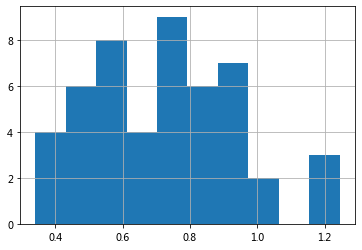

In [27]:
rtn_predictor_ma_std = rtn_predictor_ma.std()
rtn_predictor_ma_std.hist()
plt.show()

可以看出，不同股票间，动量信号的波动率分布在0.4到1.5之间，相差较大。
那么，导致这种差异的原因是什么？一个自然的想法是，不同股票的主动收益本来就分布不同，有的波动大，有的波动小。
这自然导致其动量信号也是同样，有的波动大，有的波动小。
那我们可以画图对比一下，我们先画不同股票信号波动率的柱状图：

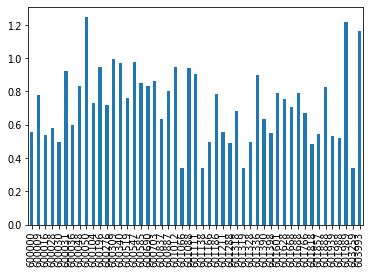

In [28]:
rtn_predictor_ma_std.plot(kind='bar')
plt.show()

接着，我们画不同股票主动收益的波动率的柱状图：

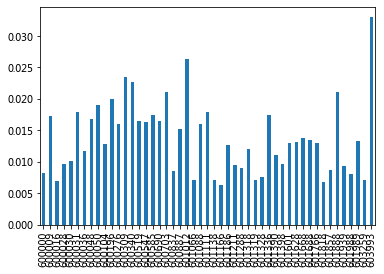

In [29]:
stock_active_rtn_std = stock_active_rtn.std()
stock_active_rtn_std.plot(kind='bar')
plt.show()

从以上两个图中，我们可以粗略看出，确实前面说的性质，波动率本来就较高的股票，其动量信号的波动率也较高。
那么，二者之间有没有什么相对确定性的关系呢？我们先作个相关关系的散点图：

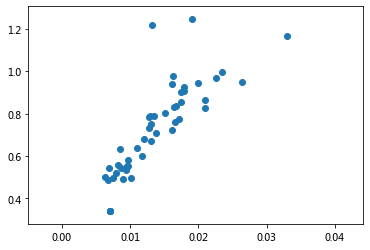

In [30]:
plt.scatter(stock_active_rtn_std, rtn_predictor_ma_std)
plt.show()

很明显，两个变量间，相关性很强，有一定的线性关系，我们做个简单的回归分析：

In [31]:
print(sp.stats.linregress(stock_active_rtn_std, rtn_predictor_ma_std))

LinregressResult(slope=32.27874024239613, intercept=0.27800185263354577, rvalue=0.8348280183205319, pvalue=8.99921079567584e-14, stderr=3.1048205411300738)


这意味着回归的R方可达0.92。从p值看，回归非常显著。但截距项的存在却让人困惑，要知道，其自变量和因变量都是标准差，不可能为负。而截距项的存在就可能引入负的标准差。故，我们将其关系简化为无截距项的线性关系，即
$$ \mathbf{Std}_{TS}[g_n] = c \cdot \omega_n $$
其中，$\mathbf{Std}_{TS}[g_n]$是对第n只股票的原始预测$g_n$在时间序列上的波动率，$\omega_n$是股票n的主动收益率的波动率，$c$是一个常数。

接下来，我们来求这个常数，用一个比较简单的方法：
$$c = \mathbf{Std}_{TS}[\frac{g_n}{\omega_n}]$$

In [32]:
rtn_predictor_ma_omega = rtn_predictor_ma / np.repeat(stock_active_rtn_std.values.reshape(1, stock_active_rtn_std.size), len(stock_active_rtn), axis=0)
stock_ma_c = rtn_predictor_ma_omega.values.std()
print('c =', stock_ma_c)

c = 84.41346362870664


以上，我们通过分析动量信号的原始预测，得出了常数c，它是我们截面分析时求取$\alpha$的重要参数。

#### 8.4.4.3 步骤三：多角度计算信息系数IC

接下来，我们要计算IC。IC的计算永远是预测的重点，IC在多大程度上能计算准确，也是很有讲究。
计算IC时，我们会遇到一个问题：在面对截面预测时，IC是否应该在截面计算？或者面板计算？
逻辑上看，使用面板数据计算比较有道理，但在截面上计算IC，可以看出IC是否随时间的变化而表现稳定，也是有所裨益的。
所以，我们先在截面上计算IC：

In [33]:
ic_ma_cs = np.empty((len(stock_active_rtn)))
for i in range(ic_ma_cs.size):
    ic_ma_cs[i] = np.corrcoef(stock_active_rtn.shift(-1).fillna(0.0).iloc[i,:], rtn_predictor_ma.iloc[i,:])[0,1]

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


我们来画个图，看看IC是如何变化的：

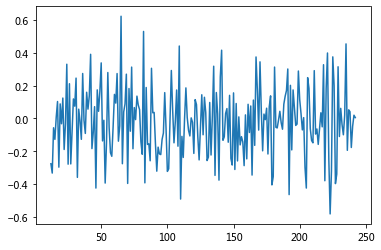

In [34]:
plt.plot(ic_ma_cs)
plt.show()

看起来不是特别直观，我们来计算一下它的20日移动平均，再画图：

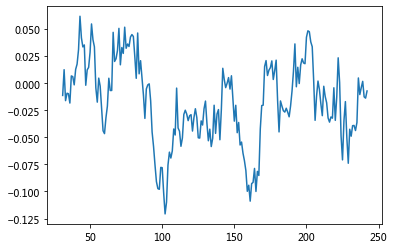

In [35]:
plt.plot(ma_calculator(pd.DataFrame(ic_ma_cs), 20))
plt.show()

我们从图中可以看到，IC还是偏正数，在一年之内有一定反复，但没有明显规律。
我们在结合行情图看看，IC的变化，是否于行情有关：

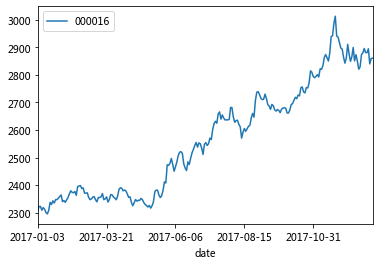

In [36]:
index_close.plot()
plt.show()

和行情对比后，发现IC的变化也无明显规律，看起来，IC还是比较靠谱的，不太随行情变化而变化。
接下来，我们就从面板数据上，综合的计算IC：

In [37]:
ic_ma = np.corrcoef(stock_active_rtn.shift(-1).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor_ma.values.reshape(rtn_predictor_ma.size))[0,1]
print(ic_ma)

-0.019236825542949088


这样，我们计算出了IC，看起来还算稳定，0.014，不高不低，可以将就使用。

#### 8.4.4.4 步骤四：计算精炼预测$\alpha$

在以上的实验中，我们获得了计算精炼预测的所有参数，现在，我们可以轻易计算精炼预测$\alpha$了：
$$\alpha = IC \cdot \frac{\mathbf{Std}_{CS}[g_n]}{c} \cdot z_{CS}$$

In [38]:
alpha_ma = ic_ma / stock_ma_c * rtn_predictor_ma
print(alpha_ma.tail())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25  0.000192 -0.000000  0.000176  0.000046  0.000082  0.000227   
2017-12-26  0.000209  0.000046  0.000192  0.000023  0.000082 -0.000094   
2017-12-27  0.000161 -0.000034  0.000120 -0.000094 -0.000023 -0.000227   
2017-12-28  0.000058 -0.000000  0.000082 -0.000120 -0.000023 -0.000227   
2017-12-29  0.000046 -0.000011  0.000082 -0.000107  0.000011 -0.000209   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-12-25 -0.000034 -0.000192  0.000354  0.000011  ...  0.000468 -0.000082   
2017-12-26 -0.000023 -0.000246  0.000399  0.000011  ...  0.000468 -0.000147   
2017-12-27 -0.000046 -0.000246  0.000354  0.000034  ...  0.000468 -0.000209   
2017-12-28  0.000094 -0.000246  0.000292  0.000070  ...  0.000399 -0.000209   
2017-12

### 8.4.5 延伸阅读——SciPy

在本节中，我们将简要介绍Python软件包SciPy。

SciPy是一个基于Python的软件包，它包含一系列工具箱，致力于解决科学计算中的常见问题。它的不同子模块对应与不同领域的应用，例如插值、积分、优化、图像处理、统计等等。

它的功能不亚于其它标准科学计算程序库，例如基于C/C++的GSL，或者Matlab工具箱。它是Python中科学计算程序的核心包，它用于有效的计算numpy矩阵，让numpy和scipy协同工作。

在实现一个科学计算前，有必要先检查一下是否可以直接使用SciPy提供的方法解决问题。我们常常喜欢从头造轮子，这是非常不好的。SciPy稳定、可靠、高效，应尽可能的使用。

我们来看看SciPy的常用模块：
1. scipy.cluster 聚类
2. scipy.constants 物理/数学常数
3. scipy.fftpack 傅里叶变换
4. scipy.integrate 积分
5. scipy.interpolate 插值
6. scipy.io 输入输出
7. scipy.linalg 线性代数
8. scipy.ndimage n维图像
9. scipy.odr 正交距离回归
10. scipy.optimize 优化
11. scipy.signal 信号处理
12. scipy.sparse 稀疏矩阵
13. scipy.spatial 空间数据结构和算法
14. scipy.special 特殊数学函数
15. scipy.stats 统计

对我们来说，最常用的莫过于scipy.stats统计，有时也会用到scipy.linalg线性代数和scipy.optimize优化。

由于其函数太多，太过于复杂，我们不能一一介绍。
正确的学习方法也绝非直接阅读其手册。

我们建议，每当遇到科学计算的问题时，就去SciPy对应模块的手册中检索，看看它是否提供了解决问题的工具。如果有，在专项的仔细学习这个工具，并使用之。我们不是机器，储存scipy手册的工作不应由我们来做，我们只需要知道它在哪里即可。
它就在这里：

https://www.scipy.org/

# 8.5 信号的时间尺度

### 8.5.1 导言

信息具有时间维度，它们到达的频率不同，其价值体现的时期有长有短。多数信息的到达频率是固定的，而我们更感兴趣的是其保质期，即信息的时间尺度。
这是一个将在三四天内消失的快速信号，还是一个在随后一年中具有持续价值的缓慢信号？最新的信息并不一定是最好的，在某些情况下，新信息与旧信息的混合比最新的信息更有价值。

在前面几节中，我们了解了如何从原始信号中，得出精炼预测。在本节中，我们要先从时间维度上处理原始信号，然后再用同样的方法得出精炼预测。虽然有很大部分程序与前面几节完成的工作类似，但是，我们的程序也将越来越精练。我们将和读者共同体验不断优化程序的过程。

### 8.5.2 基础知识准备

对策略的信息时间尺度或信息保质期的一个自然定义是IC的衰减速率，即衰减系数。它衡量了，如果我们在获得信号后，因为种种原因，比如拖延症，使得我们下单晚了一天，那么我们将付出怎样的代价。一般来说，延迟下单会导致我们的业绩下降，即IC的下降。那么IC衰减到一半所需要延迟的时间，即半衰期，就是一个很好的度量。谈到半衰期，如果它能比较好的度量IC的衰减，那么，这意味着IC的衰减是类似于指数衰减的。这是一个合理的假设，这等价于，在每个时期中，IC衰减固定的比例。

而且，经过数学推导，我们发现，在时间维度上重组信号，对于半衰期没有任何影响。这是一个非常好的性质，可以让我们做更多的事情。我们可以推导出，如何在时间维度上重组信号是最优的：
$$s^\star(0) = s(0) - \rho \cdot s(-\Delta t) + \delta \cdot s^\star(-\Delta t)$$
其中，$s(0)$表示当前到达的新信号，$s^\star(0)$表示$s(0)$在时间维度重组后的信号，$s(-\Delta t)$表示上一期到达的信号，$s\star(-\Delta t)$表示$s(-\Delta t)$在时间维度重组后的信，$\delta$表示衰减系数，$\rho$表示信号的自相关系数。

详细的数学细节我们并不推导，我们只需要知道上式包含两部分，一部分是新信号所带来的新信息，另一部分是旧信号所遗留的信息。这样就不难理解上式的意义了。本节的实验，将围绕上式来进行。

### 8.5.3 操作总览

本实验由以下几个步骤组成：
1. 步骤一：分别计算前述信号的自相关系数
2. 步骤二：分别计算前述信号的衰减系数
3. 步骤三：分别在时间尺度上混合前述信号
4. 步骤四：重新计算混合信号的IC和$\alpha$

### 8.5.4 操作流程

#### 8.5.4.0 准备工作

和前面的小节一样，本节的代码也是可以独立运行的，所以我们需要先做一些准备工作。

首先，我们导入包：

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats

import tushare as ts

然后我们获取股票数据和上证50指数数据：

In [40]:
stock_list = ts.get_sz50s().code
stock_list = stock_list[stock_list != '601236']
stock_data = {}
for stock in stock_list:
    stock_data[stock] = ts.get_k_data(stock, start='2017-01-01', end='2017-12-31')
    
index_name = '000016'
index_data = ts.get_k_data(index_name, index=True, start='2017-01-01', end='2017-12-31')

/opt/conda/lib/python3.7/site-packages/tushare/stock/classifying.py:266: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


整理数据：

In [41]:
#整理股票数据
stock_0 = pd.DataFrame(index=index_data.date)
stock_na = pd.DataFrame(index=index_data.date)
stock_open = stock_0.copy()
stock_high = stock_0.copy()
stock_low = stock_0.copy()
stock_close = stock_0.copy()

for stock in stock_list:
    stock_0 = stock_0.join(pd.DataFrame(0.0, index=stock_data[stock].date, columns=[stock]))
    stock_na = stock_na.join(pd.DataFrame(stock_data[stock].open.isna().values, index=stock_data[stock].date, columns=[stock]))
    stock_open = stock_open.join(pd.DataFrame(stock_data[stock].open.values, index=stock_data[stock].date, columns=[stock]))
    stock_high = stock_high.join(pd.DataFrame(stock_data[stock].high.values, index=stock_data[stock].date, columns=[stock]))
    stock_low = stock_low.join(pd.DataFrame(stock_data[stock].low.values, index=stock_data[stock].date, columns=[stock]))
    stock_close = stock_close.join(pd.DataFrame(stock_data[stock].close.values, index=stock_data[stock].date, columns=[stock]))
    
stock_rtn = stock_0.copy()
for stock in stock_list:
    stock_rtn[stock] = stock_close[stock] / stock_close[stock].shift() - 1
stock_rtn = stock_rtn.fillna(0)

#整理指数数据
index_0 = pd.DataFrame(0.0, index=index_data.date, columns=[index_name])
index_open = pd.DataFrame(index_data.open.values, index=index_data.date, columns=[index_name])
index_high = pd.DataFrame(index_data.high.values, index=index_data.date, columns=[index_name])
index_low = pd.DataFrame(index_data.low.values, index=index_data.date, columns=[index_name])
index_close = pd.DataFrame(index_data.close.values, index=index_data.date, columns=[index_name])

index_rtn = index_close / index_close.shift() - 1
index_rtn = index_rtn.fillna(0)

#计算主动收益率
stock_active_rtn = stock_rtn - np.repeat(index_rtn.values, stock_rtn.columns.size, axis=1)
stock_active_rtn_std = stock_active_rtn.std()

计算“红三兵”：

In [42]:
def cal_rtn_predictor_r3s():
    #初始化返回值
    res = stock_0.copy().fillna(0)
    #计算每只股票的预测值
    for stock in stock_list:
        #计算每日的预测值
        for i in range(2, len(stock_0)):
            idx = list(range(i - 2, i + 1))      
            if stock_na[stock][idx].sum():
                #剔除近三日有停牌的股票
                res[stock][i] = 0.0
            else:
                o = stock_open[stock][idx].copy()
                c = stock_close[stock][idx].copy()
                h = stock_high[stock][idx].copy()
                l = stock_low[stock][idx].copy()
                r = stock_rtn[stock][idx].copy()
                os = o.shift(-1)
                #计算
                d = (r > 0).sum()
                #近三日中有两日以上上涨
                if d > 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os > o).sum() + (os < c).sum()
                    #计算惩罚函数
                    loss = (c / h - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看涨，预测收益率
                        res[stock][i] = 0.05 - loss
                #近三日中有两日以上没有上涨
                elif d < 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os < o).sum() + (os > c).sum()
                    #计算惩罚函数
                    loss = (c / l - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看跌，预测收益率
                        res[stock][i] = -0.05 + loss
    return res

rtn_predictor_r3s = cal_rtn_predictor_r3s()

计算动量信号：

In [43]:
def ma_calculator(data, n):
    res = data.copy()
    for i in range(1, n):
        res += data.shift(i)
    return res / n

def cal_rtn_predictor_ma():
    stock_ma_excess = ma_calculator(stock_close, 3) / ma_calculator(stock_close, 13) - 1
    stock_ma_excess_quantile = stock_ma_excess.fillna(0.0).rank(axis=1) / 51.0
    return stock_ma_excess_quantile.apply(sp.stats.norm(0,1).ppf)

rtn_predictor_ma = cal_rtn_predictor_ma()

以上，我们完成了本章的准备工作，其主要是整理前几章的相关内容。

#### 8.5.4.1 步骤一：分别计算前述信号的自相关系数

计算自相关系数，属于时间序列范畴，我们引入包StatsModels，其中关于时间序列的模块tsa则是本节所需要的。

我们首先介绍一下StatsModels包。
它是一个包含很多统计模型的Python库，能完成很多统计测试、数据探索以及可视化。它包含的模型主要有：
1. 线性模型
2. 广义线性模型
3. 鲁棒线性模型
4. 线性混合效应模型
5. 方差分析模型
6. 时间序列模型
7. 状态空间模型
8. 广义矩估计方法

和上一章提到的SciPy一样，StatsModels包含太多模型和方法，我们无法穷尽它的细节。更推荐的做法是：每当遇到统计模型的问题时，就去StatsModels对应模块的手册中检索，看看它是否提供了解决问题的工具。如果有，在专项的仔细学习这个工具，并使用之。它的介绍在这里：

http://www.statsmodels.org/

接下来，我们导入包：

In [44]:
from statsmodels.tsa.stattools import acf

我们以股票600000为例，计算一下动量信号的自相关系数：

[ 1.          0.93023372  0.82674886  0.70790518  0.59257509  0.47969269
  0.37244609  0.26912636  0.1694691   0.07518435 -0.008938   -0.07871869
 -0.11816038 -0.13122394 -0.15376161 -0.18002692 -0.20619431 -0.22308628
 -0.23525521 -0.25602086 -0.28082704 -0.3077236  -0.33102424 -0.35233888
 -0.35420684 -0.33232813 -0.29834557 -0.26235215 -0.22144704 -0.17301155
 -0.1096901  -0.02804077  0.04079616  0.09818323  0.13951617  0.15494347
  0.15578265  0.14698332  0.14474504  0.14737309  0.14007826]


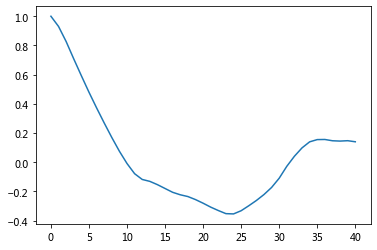

In [45]:
acf_600000 = acf(rtn_predictor_ma['600000'])
print(acf_600000)
plt.plot(acf_600000)
plt.show()

可以看出，其自相关性还是比较明显的。一阶自相关系数为0.93。
然后，我们可以计算在不同股票上，动量信号的一阶自相关系数：

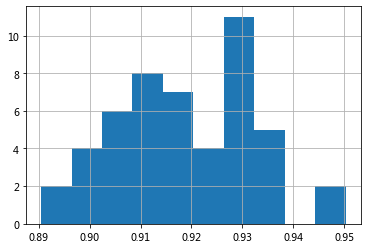

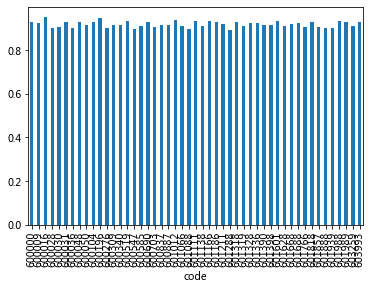

In [46]:
acf_ma_all = pd.Series(index=stock_list)
for stock in stock_list:
    acf_ma_all[stock] = acf(rtn_predictor_ma[stock])[1]
acf_ma_all.hist()
plt.show()
acf_ma_all.plot(kind='bar')
plt.show()

可以看到，不同股票上，动量信号的一阶自相关系数非常接近，我们完全可以假设它们相同。
事实上，我们通常也确实是这样假设的：

In [69]:
acf_ma = acf_ma_all.mean()
print(acf_ma)

0.9191073462450744


同理，我们可以计算“红三兵”的自相关系数：

C:\Users\huang\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:476: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


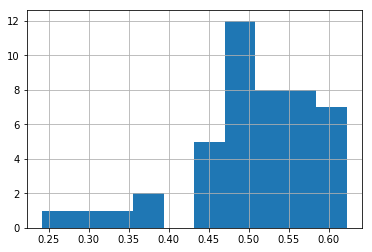

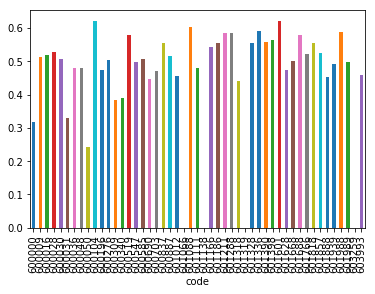

0.5028796300128511


In [70]:
acf_r3s_all = pd.Series(index=stock_list)
for stock in stock_list:
    acf_r3s_all[stock] = acf(rtn_predictor_r3s[stock])[1]
acf_r3s_all.hist()
plt.show()
acf_r3s_all.plot(kind='bar')
plt.show()
acf_r3s = acf_r3s_all.mean()
print(acf_r3s)

#### 8.5.4.2 步骤二：分别计算前述信号的衰减系数

我们计算IC = IC(1)时，是计算t时刻某信号的预测与t+1时刻标的的收益率的相关系数。
而我们可以类似的计算IC(2)，即t时刻该信号的预测与t+2时刻标的的收益率的相关系数。
而IC(2) / IC(1)即可用于估计衰减系数。那么，我们先来计算两个信号的IC：

In [71]:
ic_r3s = np.corrcoef(stock_active_rtn.shift(-1).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor_r3s.values.reshape(rtn_predictor_r3s.size))[0,1]
ic_ma = np.corrcoef(stock_active_rtn.shift(-1).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor_ma.values.reshape(rtn_predictor_ma.size))[0,1]
print(ic_r3s, ic_ma)

0.0014397873369858627 0.013468939341334656


我们可以按公式计算两个信号各自的IC(2)：

In [72]:
ic_r3s_2 = np.corrcoef(stock_active_rtn.shift(-2).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor_r3s.values.reshape(rtn_predictor_r3s.size))[0,1]
ic_ma_2 = np.corrcoef(stock_active_rtn.shift(-2).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor_ma.values.reshape(rtn_predictor_ma.size))[0,1]
print(ic_r3s_2, ic_ma_2)

-0.00221351731887944 0.01032699576101362


我们注意到，红三兵的IC(2)竟然是负的，这看起来不符合我们的假设，但也很可能是误差导致的。所以，我们需要更精确的计算。
一个显然的方法是：再计算IC(3)……IC(60)，然后分别计算IC(3)/IC(2)……IC(60)/IC(59)，最后求均值。为了方便起见，我们写两个函数来处理：

In [89]:
def cal_ic(rtn_predictor, n):
    res = pd.Series((n), dtype=float)
    for i in range(n):
        res[i] = np.corrcoef(stock_active_rtn.shift(-i - 1).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor.values.reshape(rtn_predictor.size))[0,1]
    res.plot()
    plt.show()
    return res

def cal_ac(rtn_predictor):
    ic = cal_ic(rtn_predictor, 60)
    ac = ic / ic.shift()
    ac[ac > 1] = 1
    ac[ac < 0] = 0
    ac.plot(kind='bar')
    plt.show()
    return ac.mean()

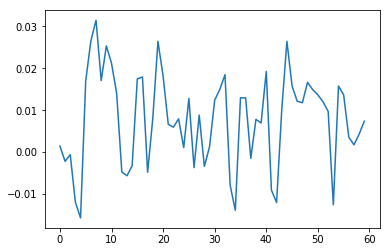

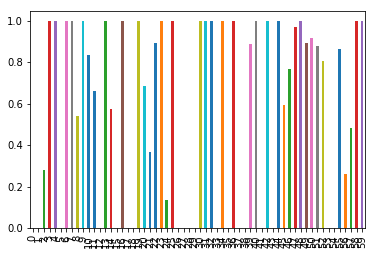

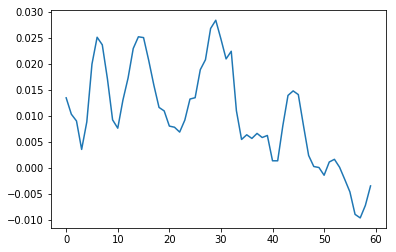

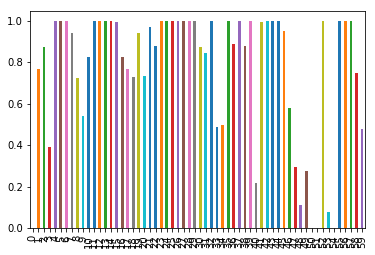

衰减系数 ac =  0.5815503188517991 0.7817295212566163


In [91]:
ac_r3s = cal_ac(rtn_predictor_r3s)
ac_ma = cal_ac(rtn_predictor_ma)
print("衰减系数 ac = ", ac_r3s, ac_ma)

我们可以看到，衰减系数的估计，并不很准确。这与我们用的方法较为简单有关。
在这个问题上，尚有很多改进方案，读者也可以好好想一想。

一个可能的改进方案是：既然我们假设IC按指数衰减，那么，我们可以求log(IC(n))，这样，可以把指数衰减变为线性衰减。
然后，我们可以通过回归的方式，得到衰减系数。

另外，充足的数据量，也是精确计算衰减系数的保证。而且，我们现在是在日尺度上计算衰减系数，如果我们按月尺度计算，然后再折算到日上面，应该会有更好的结果。我们把这里的改进方案作为我们的课堂联系，由读者来完成。

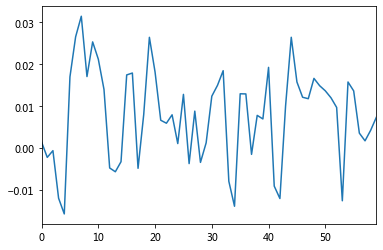

7.280815919574679e-06 0.007591605034250757


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


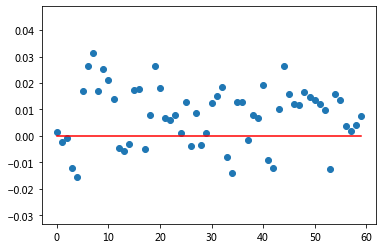

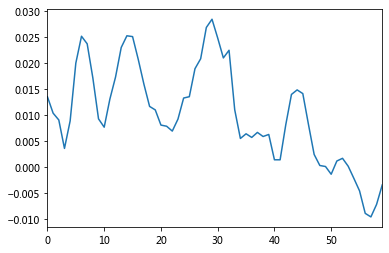

-0.00034213393678649603 0.020249506453025846


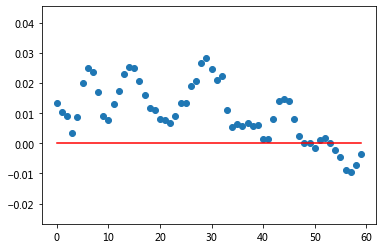

衰减系数 ac =  7.280815919574679e-06 -0.00034213393678649603


In [74]:
#改进衰减系数的计算方法。
def cal_ic(rtn_predictor, n):
    res = pd.Series((n), dtype=float)
    for i in range(n):
        res[i] = np.corrcoef(stock_active_rtn.shift(-i - 1).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor.values.reshape(rtn_predictor.size))[0,1]
    res.plot()
    plt.show()
    return res

def cal_ac(rtn_predictor):
    ic = cal_ic(rtn_predictor, 60)
    x=np.arange(60)
    y=np.array(pd.Series.tolist(ic))
    for k in y:
        k=np.log10(k)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    f1,f2=0,0
    for x_i, y_i in zip(x, y):    
        f1 += (x_i - x_mean) * (y_i - y_mean)    
        f2 += (x_i - x_mean) ** 2 
    a = f1/f2
    b = y_mean - a*x_mean
    print(a,b)
    a_=int(a)
    b_=int(b)
    y_line = a_*x + b_
    plt.figure()
    plt.scatter(x,y)
    plt.plot(x, y_line, color='r')
    plt.show()
    return a

ac_r3s = cal_ac(rtn_predictor_r3s)
ac_ma = cal_ac(rtn_predictor_ma)
print("衰减系数 ac = ", ac_r3s, ac_ma)

#### 8.5.4.3 步骤三：分别在时间尺度上混合前述信号

根据公式
$$s^\star(0) = s(0) - \rho \cdot s(-\Delta t) + \delta \cdot s^\star(-\Delta t)$$
我们可以在时间尺度上混合前述信号：

In [93]:
def cal_mix_predictor(rtn_predictor, rho, delta):
    res = rtn_predictor.copy()
    for i in range(1, len(res)):
        res.iloc[i, :] = rtn_predictor.iloc[i, :] - rho * rtn_predictor.iloc[i - 1, :] + delta * res.iloc[i - 1, :]
    return res

rtn_mix_predictor_r3s = cal_mix_predictor(rtn_predictor_r3s, acf_r3s, ac_r3s)
rtn_mix_predictor_ma = cal_mix_predictor(rtn_predictor_ma, acf_ma, ac_ma)

print("红三兵混合信号：")
print(rtn_mix_predictor_r3s.tail())
print("动量混合信号：")
print(rtn_mix_predictor_ma.tail())

红三兵混合信号：
              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25  0.000160  0.002119  0.001924  0.025155  0.002366  0.000144   
2017-12-26  0.001428  0.001232  0.001119  0.026365  0.000207  0.000084   
2017-12-27  0.003792  0.000717  0.005501  0.015655  0.000120  0.000049   
2017-12-28  0.001024  0.000417  0.005224  0.023895  0.002727  0.000028   
2017-12-29  0.001266  0.000242  0.000793  0.007409  0.000250  0.000016   

              600036        600048        600050    600104    ...     \
date                                                          ...      
2017-12-25  0.007055  3.777006e-07  8.444062e-06  0.027803    ...      
2017-12-26  0.001681  2.196519e-07  4.910647e-06  0.004288    ...      
2017-12-27  0.000978  1.277386e-07  2.855788e-06  0.002494    ...      
2017-12-28  0.000569  1.599057e-03  1.660785e-06  0.001450    ...      
2017-12-29  0.000331  1.258363e-04  9.65

#### 8.5.4.4 步骤四：重新计算混合信号的IC和$\alpha$

信号在时间尺度上混合后，再计算IC时，会有变化，理论上应该更大一点。我们通过函数来计算一下：

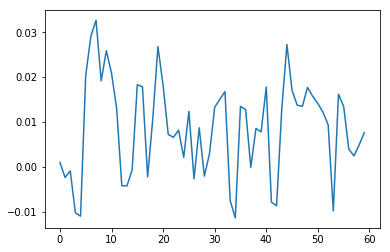

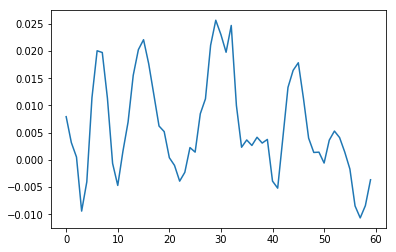

0.001000155403200402 0.00792805944205611


In [94]:
ic_mix_r3s = cal_ic(rtn_mix_predictor_r3s, 60)[0]
ic_mix_ma = cal_ic(rtn_mix_predictor_ma, 60)[0]
print(ic_mix_r3s, ic_mix_ma)

可以看出IC的计算，也不太稳定，这也是跟算法有关，读者可以试着改进其算法。

下面我们用混合后的信号来计算精炼预测，我们先从“红三兵”开始，我们使用基于时间序列数据的方法来计算：

In [95]:
def cal_ts_alpha(rtn_predictor, ic):
    z = rtn_predictor / rtn_predictor.values.std()
    return np.repeat(np.array(stock_active_rtn_std).reshape(1, stock_rtn.columns.size), len(stock_rtn), axis=0) * ic * z

alpha_mix_r3s = cal_ts_alpha(rtn_mix_predictor_r3s, ic_mix_r3s)
print(alpha_mix_r3s.tail())

                  600000        600009        600016    600028        600030  \
date                                                                           
2017-12-25  1.424358e-07  3.945894e-06  1.449481e-06  0.000026  2.602283e-06   
2017-12-26  1.273286e-06  2.294736e-06  8.429464e-07  0.000027  2.278546e-07   
2017-12-27  3.381279e-06  1.334504e-06  4.143776e-06  0.000016  1.325089e-07   
2017-12-28  9.131710e-07  7.760814e-07  3.935013e-06  0.000025  2.998736e-06   
2017-12-29  1.128860e-06  4.513304e-07  5.974754e-07  0.000008  2.746648e-07   

                  600031        600036        600048        600050    600104  \
date                                                                           
2017-12-25  2.780610e-07  8.954084e-06  6.847410e-10  1.746159e-08  0.000039   
2017-12-26  1.617064e-07  2.133592e-06  3.982114e-10  1.015480e-08  0.000006   
2017-12-27  9.404044e-08  1.240791e-06  2.315799e-10  5.905524e-09  0.000003   
2017-12-28  5.468925e-08  7.215824e-07 

接下来，我们计算动量信号，我们需要使用基于截面数据的算法来计算：

In [96]:
def cal_cs_alpha(rtn_predictor, ic):
    std_cs = rtn_predictor.std(axis = 1)
    z = rtn_predictor.fillna(0.0) / np.repeat(std_cs.values.reshape(std_cs.size, 1), stock_list.size, axis=1)
    z_omega = z / np.repeat(stock_active_rtn_std.values.reshape(1, stock_active_rtn_std.size), len(stock_active_rtn), axis=0)
    c = z_omega.fillna(0.0).values.std()
    return ic / c * z

alpha_mix_ma = cal_cs_alpha(rtn_mix_predictor_ma, ic_mix_ma)
print(alpha_mix_ma.tail())

                  600000        600009        600016        600028  \
date                                                                 
2017-12-25 -1.694347e-19  3.411244e-21 -1.503134e-19  3.475472e-20   
2017-12-26 -2.652619e-19 -2.138868e-20 -1.608419e-19  7.648812e-20   
2017-12-27 -1.455450e-19  2.884523e-20 -5.308107e-20  1.913201e-19   
2017-12-28 -6.491601e-20 -1.401320e-20 -5.115349e-20  2.114418e-19   
2017-12-29  4.153210e-20  1.119643e-20 -3.897163e-20  1.683760e-19   

                  600030        600031        600036        600048  \
date                                                                 
2017-12-25  3.042788e-20 -1.173191e-19  1.063092e-19  4.770949e-19   
2017-12-26  2.785926e-20  3.309475e-19  1.098255e-19  4.662408e-19   
2017-12-27  2.584313e-20  4.780090e-19  1.274785e-19  4.800827e-19   
2017-12-28  1.765910e-19  5.048883e-19  9.873037e-21  3.678626e-19   
2017-12-29  6.160563e-20  4.392523e-19 -1.864933e-19  3.343236e-19   

                  

### 8.5.5 延伸阅读——另类信号

我们在精炼信号的过程中，用到了比较复杂的方法。尽管复杂，但终归是线性的方法。
然而，我们其实也知道，线性的方法在刻画现实上，往往是很无力的。
那么，非线性的方法能否应用进来呢？

事实上，确实有很多人尝试了很多非线性的方法，也找到了一些不错的方法，我们将简介于此。
然而，我们要注意的是，在真正的基金中，非线性方法的实践是非常罕见的。
因为，对大部分基金经理而言，委托代理风险比市场风险更重要——
1. 如果非线性方法赚钱了，客户不会觉得基金经理有多厉害，他会觉得这是基金经理应该具有的能力；
2. 如果非线性方法亏钱了，客户会认为是基金经理的错。
所以，对于基金经理而言，保守而禁得起推敲的方法更受欢迎。

下面，我们还是介绍一些非线性方法：

#### 8.5.5.1 时间序列分析

这是一个自成体系的世界，它有一套自己的术语和记号。它的经典模型有AR，MA，ARMA，ARIMA，VARMA等等。
这些都是线性模型，但也可以加入非线性的方法。根据笔者自身的体验，这类模型用处并不大。

#### 8.5.5.2 ARCH、GARCH模型

它们脱胎于时间序列分析，常用于波动率的预测。相比于其它模型，它们对波动率的预测还是比较准确的，也在下一章要讲的风险预测模型中有一席之地。
在期权策略中，它们也得到了更广泛而深入的研究和实践。

#### 8.5.5.3 Kalman滤波

它也脱胎于时间序列分析，它与贝叶斯分析联系也很密切。不过，它的工作流程常常被电子工程/最优控制等领域的术语所掩盖。
这给我们对它的理解增加了障碍，使它显得晦涩难懂。不过，它的思想还是很有可取之处的。

#### 8.5.5.4 混沌

混沌理论关注不稳定现象和非线性现象。它希望能区分完全随机现象和有某种确定的但高度非线性的方式产生的可预测现象（伪随机）；因为二者看起来实在太像了。利用混沌来处理信号的核心在于升维，一个好的升维方式可以使我们更容易的找到规律。但怎样找到合适的升维方式，和怎样找到一个线性预测因子同样艰难。

#### 8.5.5.5 遗传算法

它有一个非常直观的理解，即模拟生物进化的过程。当一套参数的绩效表现得不好时，它就被淘汰；当一套参数得绩效表现得好时，我们允许它留下更多后代——即在它附近生成更多套参数。这种试错得方法看起来能得到最优得参数。但实践中，它并不总能收敛，即使收敛，也并不总能在可接受的时间内得出结果。而且，它也比较依赖初值的选取。

#### 8.5.5.6 神经网络

这是近期非常火的领域，可惜，它最多的应用还是在于图像识别等信噪比高的领域。在低信噪比的金融数据中，尚未发现它能有所建树。它最早发轫于20世纪六七十年代，当时由于算力不够，只能研究浅层神经网络，应用也比较局限。后来，在八十年代，BP算法的发明解决了一部分问题，使计算机能快速计算这类问题了，于是，浅层神经网络得到了一次大发展。但深层神经网络依然未被攻破。至本世纪初，多伦多大学的Hinton，结合了非监督学习的方法，发明了深层神经网络的优化方法。这就被称为深度学习。这开创了神经网络的又一波研究高潮，各种算法层出不穷，深度学习能解决的问题也飞速增加。也有很多人尝试将其用于信号的挖掘，不过，尚未发现有很好的应用。

# 8.6 风险预测

### 8.6.1 导言

普通投资者和专业投资者的区别就在于，普通投资者往往只预测收益，而专业投资者往往还要预测风险。
收益和风险是投资这个天枰的两端，专业投资者需要同时预测二者，并加以权衡。

如果说收益预测是一门艺术的话，风险预测则是地地道道的数学了。二者都很难，但难点不同：收益预测往往需要扎实的金融功底和一点点的灵光一现；风险预测则需要扎实的数学功底和严谨的科学素养。由于篇幅有限，本节将忽略风险预测中的理论推导，直接给出当前业内通行的风险预测模型框架，并和读者一起编程实现该框架下的一种简单风险预测模型。

我们将和读者一起完成一个股票风险预测模型，
模型比较简单，我们将使用Fama-French三因子模型来对风险建模。
事实上，业界流行的模型大约有50-100个因子。
当然，其中绝大部分是行业因子，这也完全可以理解。
我们虽然只使用三个因子，但我们演示的做法，
是适用于任意数量的因子的，只是细节不同罢了。

### 8.6.2 基础知识准备

在本实验中，我们将基于Fama-French三因子模型来实现股票风险预测模型。
我们先回顾一下Fama-French三因子模型：
$$ \mathbf{E}[R_i - R_f] = \beta_i \cdot \mathbf{E}[R_m - Rf] + s_i \cdot \mathbf{E}[SMB] + h_i \cdot \mathbf{E}[HML] $$
如果说股票的收益率可以分解为市场收益率、市值因子组合收益率、账面市值比因子组合收益率的话，
股票的风险也应当可以分解为市场风险、市值因子风险、账面市值比风险，以及每只股票的独有风险。

那么，怎样基于Fama-French三因子模型来建立股票风险预测模型呢？

首先，我们引入一个平凡的假设：
$$ r_i = \mathbf{E}[r_i] + \sum_k \beta_{ik} \cdot (F_k - \mathbf{E}[F_k]) + \varepsilon_i $$
其中，$r_i = R_i - R_f$。

这就是说，对于股票$i$，其超额收益应该等于其超额收益的期望与各因子的影响之和。
而因子$k$的影响等于股票$i$在因子$k$上的暴露与因子收益率在预期外的部分之乘积。

由此假设，我们可以推出股票$i$与股票$j$的协方差：
$$ \mathbf{Cov}(r_i, r_j) = \sum_{k_1, k_2} \beta_{ik_1} \cdot \mathbf{Cov}(F_{k_1}, F_{k_2}) \cdot \beta_{jk_2} + u_{ij} $$
其中，$u_{ij}$是二者不能被模型解释的独特协方差。

而股票间的协方差矩阵由此可以算出，这就是我们要预测的目标——股票的风险。

同时，Fama-French三因子模型正好为我们提供了三个有效的因子，故我们基于此，编程构建一个简单的三因子风险模型。

### 8.6.3 操作总览

本实验由以下几个步骤组成：
1. 步骤一：构造市场因子
2. 步骤二：构造规模因子
3. 步骤三：构造成长因子
4. 步骤四：计算风险——协方差矩阵

### 8.6.4 操作流程

#### 8.6.4.0 准备工作

和前面的小节一样，本节的代码也是可以独立运行的，所以我们需要先做一些准备工作。

首先，我们导入包：

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import acf
from statsmodels import api

import tushare as ts

然后我们获取股票数据和上证50指数数据：

In [49]:
stock_list = ts.get_sz50s().code
stock_list = stock_list[stock_list != '601236']
stock_data = {}
for stock in stock_list:
    stock_data[stock] = ts.get_k_data(stock, start='2017-01-01', end='2017-12-31')
    
index_name = '000016'
index_data = ts.get_k_data(index_name, index=True, start='2017-01-01', end='2017-12-31')

/opt/conda/lib/python3.7/site-packages/tushare/stock/classifying.py:266: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


整理数据：

In [50]:
#整理股票数据
stock_0 = pd.DataFrame(index=index_data.date)
stock_na = pd.DataFrame(index=index_data.date)
stock_open = stock_0.copy()
stock_high = stock_0.copy()
stock_low = stock_0.copy()
stock_close = stock_0.copy()

for stock in stock_list:
    stock_0 = stock_0.join(pd.DataFrame(0.0, index=stock_data[stock].date, columns=[stock]))
    stock_na = stock_na.join(pd.DataFrame(stock_data[stock].open.isna().values, index=stock_data[stock].date, columns=[stock]))
    stock_open = stock_open.join(pd.DataFrame(stock_data[stock].open.values, index=stock_data[stock].date, columns=[stock]))
    stock_high = stock_high.join(pd.DataFrame(stock_data[stock].high.values, index=stock_data[stock].date, columns=[stock]))
    stock_low = stock_low.join(pd.DataFrame(stock_data[stock].low.values, index=stock_data[stock].date, columns=[stock]))
    stock_close = stock_close.join(pd.DataFrame(stock_data[stock].close.values, index=stock_data[stock].date, columns=[stock]))
    
stock_rtn = stock_0.copy()
for stock in stock_list:
    stock_rtn[stock] = stock_close[stock] / stock_close[stock].shift() - 1
stock_rtn = stock_rtn.fillna(0)

#整理指数数据
index_0 = pd.DataFrame(0.0, index=index_data.date, columns=[index_name])
index_open = pd.DataFrame(index_data.open.values, index=index_data.date, columns=[index_name])
index_high = pd.DataFrame(index_data.high.values, index=index_data.date, columns=[index_name])
index_low = pd.DataFrame(index_data.low.values, index=index_data.date, columns=[index_name])
index_close = pd.DataFrame(index_data.close.values, index=index_data.date, columns=[index_name])

index_rtn = index_close / index_close.shift() - 1
index_rtn = index_rtn.fillna(0)

#计算主动收益率
stock_active_rtn = stock_rtn - np.repeat(index_rtn.values, stock_rtn.columns.size, axis=1)
stock_active_rtn_std = stock_active_rtn.std()

#### 8.6.4.1 步骤一：构造市场因子

做好准备工作之后，我们首先来构造市场因子。
市场因子的影响非常大，是人们发现的第一个风险因子。
单因素模型就是用于刻画市场因子对股票风险的影响。

在本节中，我们所说的构造市场因子，就是去找到股票对于市场的$\beta$。
我们先构造一个函数，利用20日的收益率数据，估计某日的$\beta$：

In [51]:
def cal_beta_1s1d(stock, n):
    if n < 3:
        return 1.0
    elif n < 20:
        return stats.linregress(index_rtn[index_name][0:n - 1], stock_rtn[stock][0:n - 1]).slope
    else:
        return stats.linregress(index_rtn[index_name][n - 20:n - 1], stock_rtn[stock][n - 20:n - 1]).slope        

print(cal_beta_1s1d('600000', 50))

0.8022969172557611


上面函数中，我们把前3日的$\beta$默认为1，而4-19日的$\beta$使用已有的所有数据计算，超过20日的$\beta$使用过去19日计算.
然后，我们计算所有股票在考察期内的$\beta$：

In [52]:
def cal_beta():
    res = stock_0.copy()
    for stock in stock_list:
        for i in range(len(index_rtn)):
            res[stock][i] = cal_beta_1s1d(stock, i)
    return res

beta = cal_beta()
print(beta.tail())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25  0.621537  1.298009  0.789024  0.395212  1.012136  0.261860   
2017-12-26  0.647003  1.289379  0.834835  0.375638  1.025415  0.208781   
2017-12-27  0.623028  1.347815  0.755915  0.290569  1.026449  0.290734   
2017-12-28  0.630699  1.347655  0.770249  0.302773  1.086758  0.551032   
2017-12-29  0.551209  1.334037  0.753905  0.198816  1.104131  0.585154   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-12-25  1.602433  1.032456  0.792275  0.968423  ...  0.781703  0.619985   
2017-12-26  1.623765  1.033407  0.538014  0.963504  ...  0.843443  0.625188   
2017-12-27  1.578003  0.949064  0.591861  0.969610  ...  0.849597  0.530513   
2017-12-28  1.605158  1.046558  0.627554  0.924406  ...  0.868838  0.659220   
2017-12

上面，我们计算了$\beta$，我们画个图看看几只股票的$\beta$走势图：

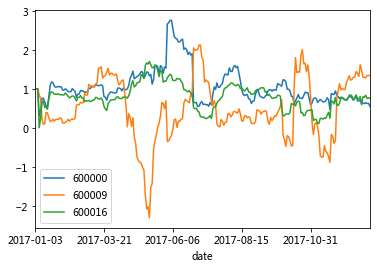

In [55]:
beta.iloc[:,0:3].plot()
plt.show()

可以看出，$\beta$的预测并不稳定，这和我们计算所用的数据偏少有关。读者可以试试用较长时间的数据来算算。
下面，我们把每只股票在一年中的$\beta$求个均值，然后画个直方图来看看$\beta$在不同股票中是如何分布的：

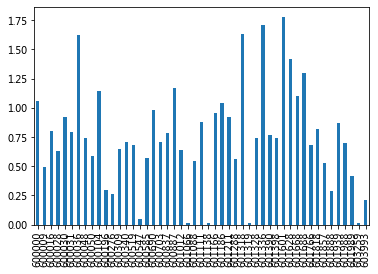

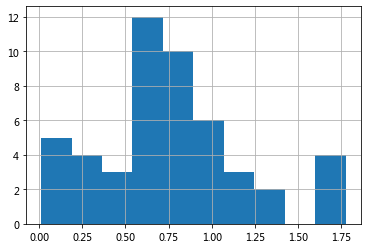

In [56]:
beta.mean().plot(kind='bar')
plt.show()
beta.mean().hist()
plt.show()

可以看出，大部分股票的$\beta$在0.6-1之间，这符合我们的认知。
但是，仅仅如此是不够的，由于我们后面会将它用于回归，
为了回归的正确性和计算的便利性，我们需要将$\beta$标准化，
使得它尽可能的接近标准正态分布。

从上图中，可以看出$\beta$还是很接近正态的，那么，我们只需给它减个均值，再除以标准差即可。而这个均值，是截面的均值；标准差，是截面的标准差。
我们先来计算均值：

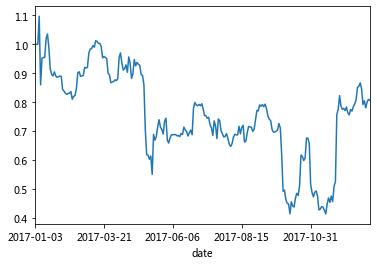

In [57]:
beta_mean = beta.mean(axis=1)
beta_mean.plot()
plt.show()

我们看到了非常奇特的图景，市场的平均$\beta$竟然会随时间有规律的变动，这一点明显需要更深入的研究和解释。

我们再算算标准差，看看能否帮助我们进一步理解这个问题：

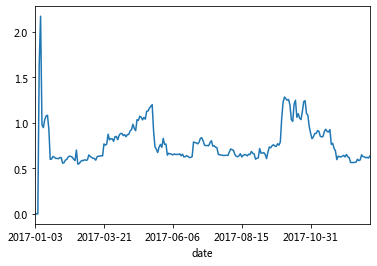

In [58]:
beta_std = beta.std(axis=1)
beta_std.plot()
plt.show()

市场中，股票$\beta$的截面波动率，同样有规律的随时间变动。我们来画个指数行情图，结合起来看看：

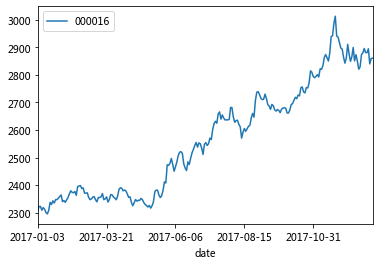

In [59]:
index_close.plot()
plt.show()

可以初步看出，在大涨的前期和大涨的后期，$\beta$的截面均值和截面标准差都出现了明显的异动。这也许对我们的交易决策会有帮助。但无论如何，我们还是要先把它标准化，再进行下一步：

In [60]:
beta_mean = np.repeat(beta_mean.values.reshape(beta_mean.size, 1), stock_list.size, axis=1)
beta_std = np.repeat(beta_std.values.reshape(beta_std.size,1), stock_list.size, axis=1)
beta_market = (beta - beta_mean) / beta_std
print(beta_market.tail())

              600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25 -0.292421  0.788068 -0.024904 -0.653916  0.331460 -0.866912   
2017-12-26 -0.216864  0.827051  0.088378 -0.657856  0.398088 -0.929012   
2017-12-27 -0.285824  0.879240 -0.072214 -0.820237  0.362658 -0.819972   
2017-12-28 -0.292562  0.876743 -0.064965 -0.827387  0.451237 -0.422493   
2017-12-29 -0.401010  0.831198 -0.081956 -0.955693  0.469316 -0.347580   

              600036    600048    600050    600104  ...    601688    601766  \
date                                                ...                       
2017-12-25  1.274306  0.363916 -0.019711  0.261640  ... -0.036597 -0.294900   
2017-12-26  1.370457  0.411075 -0.393981  0.297477  ...  0.102368 -0.252315   
2017-12-27  1.249257  0.238265 -0.335923  0.271292  ...  0.078376 -0.434538   
2017-12-28  1.296712  0.385674 -0.297692  0.186454  ...  0.095826 -0.246047   
2017-12

以上，我们就算出了市场因子的$\beta$。

#### 8.6.4.2 步骤二：构造规模因子

接下来，我们来计算规模因子的$\beta$。对于规模因子，何为因子收益率，何为因子暴露？这非常容易弄错，需要特别的辨明。

一般来说，因子暴露是股票的一个固有性质，而因子收益率是市场对该因子的看法（每天会变）。正如前面的市场因子，市场因子的$\beta$是各股票各自拥有的相对稳定的属性，它跟公司所处的行业等固有属性有关。而市场收益率，也即是市场因子的因子收益率，则每天都会变动。同理，我们在使用规模因子时，因子暴露应该就是公司的市值，它虽然每天会变动，但在市场中，一只股票的市值排名则相对稳定。

由是，我们通常由两种方法来计算因子暴露：
1. Fama-French三因子模型中的算法：
    1. 把每日股票按市值大小分为三份——大中小。
    2. 用小市值股票与大市值股票在等权平均收益率上的差作为因子收益率。
    3. 然后用每只股票的超额收益率对因子收益率回归，求得$\beta$，即因子暴露。
2. 现代结构化风险模型对该类因子的通用算法：
    1. 将每日股票的市值排名拿来标准化，即得到因子暴露。
    
考虑到我们的考察期较短，股票市值排名变化不大，因子暴露也不应变化很大。
故我们采用更简单的处理方法——直接使用最新的市值，将其标准化来作为因子暴露。

我们先来获取股票的基本面数据：

In [61]:
stock_fundemental = ts.get_stock_basics()
print(stock_fundemental.head())

        name industry area     pe  outstanding  totals  totalAssets  \
code                                                                  
688228  N开普云      互联网   广东  77.23         0.15    0.67         3.81   
300825  N阿尔特     汽车服务   北京  20.74         0.76    3.06        15.88   
603555   贵人鸟       服饰   福建   0.00         6.29    6.29        48.84   
300506   名家汇     建筑工程   深圳  11.52         4.00    6.55        39.87   
300150  世纪瑞尔     软件服务   北京   0.00         4.72    5.85        22.95   

        liquidAssets  fixedAssets  reserved  ...   bvps    pb  timeToMarket  \
code                                         ...                              
688228          3.37         0.36      0.41  ...  16.85  5.34      20200327   
300825         11.78         0.87      4.79  ...   4.43  2.00      20200327   
603555         25.23         5.02      9.19  ...   2.44  1.52      20140124   
300506         29.18         0.51      5.34  ...   3.24  1.89      20160324   
300150         14.46        

然后，我们获取我们股票池中股票总市值：

In [62]:
stock_assets = stock_fundemental.totalAssets[stock_list]
print(stock_assets.head())

code
600000    67906.70
600009      363.69
600016    62737.43
600028    18263.36
600030     7917.22
Name: totalAssets, dtype: float64


可以画个图看看总市值的分布情况：

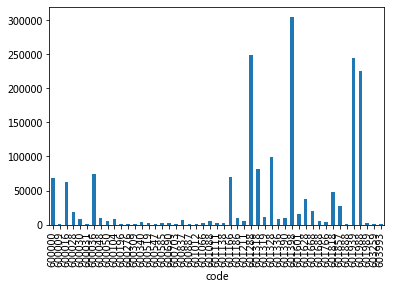

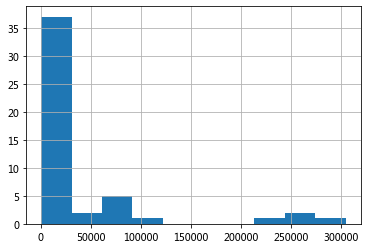

In [63]:
stock_assets.plot(kind='bar')
plt.show()
stock_assets.hist()
plt.show()

现在，我们用两种方法来将其标准化：

##### 8.6.4.2.1 直接把市值拿来标准化

从上图中，我们可以看出来，市值的分布并不均匀，偏度非常大。如果直接减均值再除以标准差，是很无效的。所以，我们要先把他变得接近正态分布。

面对这种数量级差异大的数据，我们的手法是取对数：

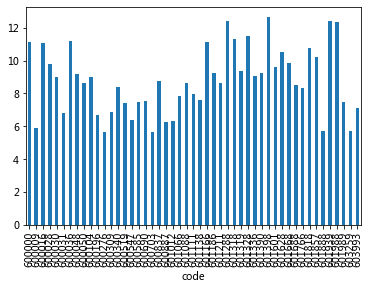

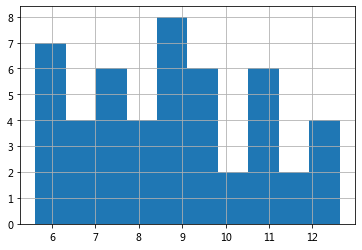

In [64]:
beta_assets = np.log(stock_assets)
beta_assets.plot(kind='bar')
plt.show()
beta_assets.hist()
plt.show()

这样，数据看起来更接近正态分布了，我们可以用和市场因子一样的方法标准化：

In [65]:
beta_assets = (beta_assets - beta_assets.mean()) / beta_assets.std()
print(beta_assets.head())

code
600000    1.168673
600009   -1.434806
600016    1.129256
600028    0.514895
600030    0.098776
Name: totalAssets, dtype: float64


##### 8.6.4.2.2 把市值先排名再标准化

我们也可以先把市值拿来排名，然后再标准化。这项技术我们在第四章讲截面预测的时候用过，我们这里再用一次，权当复习了。先排名：

In [66]:
stock_assets_rank = stock_assets.rank(ascending=False)
print(stock_assets_rank.head())

code
600000     9.0
600009    45.0
600016    10.0
600028    15.0
600030    23.0
Name: totalAssets, dtype: float64


然后转化为分位数：

In [67]:
stock_assets_quantile = stock_assets_rank / (stock_list.size + 1)
print(stock_assets_quantile.head())

code
600000    0.18
600009    0.90
600016    0.20
600028    0.30
600030    0.46
Name: totalAssets, dtype: float64


然后映射到正态分布：

code
600000   -0.915365
600009    1.281552
600016   -0.841621
600028   -0.524401
600030   -0.100434
Name: totalAssets, dtype: float64


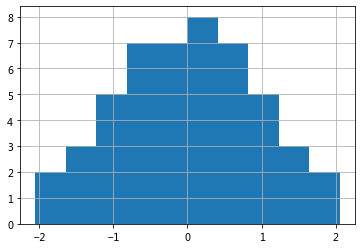

In [68]:
beta_assets = stock_assets_quantile.apply(stats.norm(0,1).ppf)
print(beta_assets.head())
beta_assets.hist()
plt.show()

以上两种方法都是可以的，第二种方法也可以应用于前面的市场因子。不过，由于第二种方法损失了相当多的距离信息，所以在对原始数据变换不多的时候，不太倾向于使用。而当我们因正态原因不得不对原始数据进行重大变换时，第二种方法相对来说，就更倾向于使用了。

不过，总的来说，两种方法都还不错。

#### 8.6.4.3 步骤三：构造成长因子

接下来，我们构造成长因子。在Fama-French三因子模型中，账面市值比是衡量成长因子的指标，即市净率。但在国内，市盈率的使用要更为普遍。所以，我们在这里也使用市盈率作为衡量成长因子的指标。

构造成长因子的方法和规模因子类似，也是两种方法：
1. 直接使用市盈率，将其标准化
2. 讲市盈率排名，在映射到正态分布上

我们在这里重点介绍第一种方法，而把第二种方法留作课堂练习。

我们先获取市盈率，并画图观察。

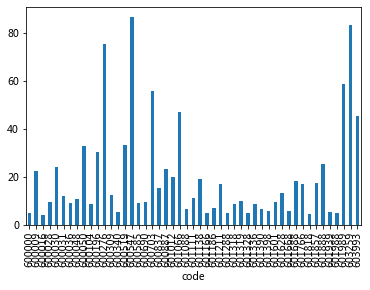

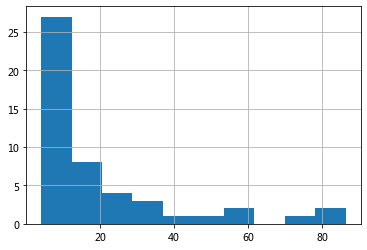

In [69]:
stock_value = stock_fundemental.pe[stock_list]
stock_value.plot(kind='bar')
plt.show()
stock_value.hist()
plt.show()

其分布差异仍然很大，不太接近正态分布。
我们先用方法一来标准化，先取对数看看：

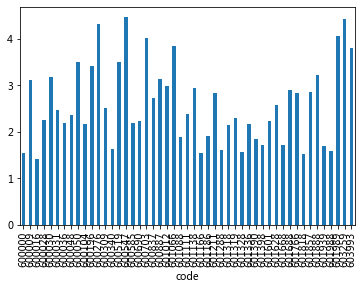

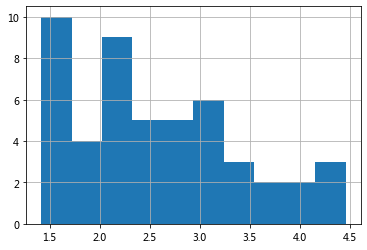

In [70]:
beta_value = np.log(stock_value)
beta_value.plot(kind='bar')
plt.show()
beta_value.hist()
plt.show()

其分布差异仍然很大，不太接近正态分布。
我们取重对数看看：

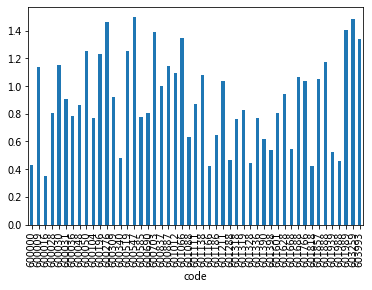

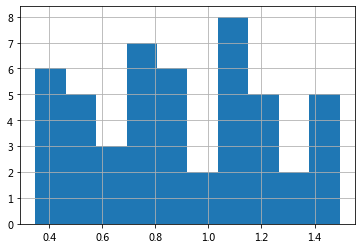

In [71]:
beta_value = np.log(np.log(stock_value))
beta_value.plot(kind='bar')
plt.show()
beta_value.hist()
plt.show()

这下看起来要好多了，我们在用减均值除以标准差的方法来标准化：

In [72]:
beta_value = (beta_value - beta_value.mean()) / beta_value.std()
print(beta_value.head())

code
600000   -1.437770
600009    0.710439
600016   -1.692278
600028   -0.288669
600030    0.769163
Name: pe, dtype: float64


下面，请读者使用方法二来把市盈率排名映射到标准正态分布，以作为价值因子的因子暴露：

code
600000    46.0
600009    14.0
600016    49.0
600028    28.0
600030    12.0
Name: pe, dtype: float64
code
600000    0.92
600009    0.28
600016    0.98
600028    0.56
600030    0.24
Name: pe, dtype: float64
code
600000    1.405072
600009   -0.582842
600016    2.053749
600028    0.150969
600030   -0.706303
Name: pe, dtype: float64


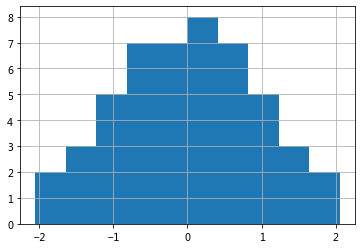

In [73]:
#使用方法二：把市盈率排名映射到标准正态分布
stock_value_rank = stock_value.rank(ascending=False)
print(stock_value_rank.head())
stock_value_quantile = stock_value_rank / (stock_list.size + 1)
print(stock_value_quantile.head())
beta_value = stock_value_quantile.apply(stats.norm(0,1).ppf)
print(beta_value.head())
beta_value.hist()
plt.show()

#### 8.6.4.4 步骤四：计算风险——协方差矩阵

所谓风险，是因子收益率的协方差矩阵，那么我们需要先计算因子收益率。

前面，我们已经计算了因子暴露，因子收益率就是个股每日的收益率对个股每日的因子暴露进行截面回归的结果。这个过程看起来比较繁琐，但在Python中，几行代码就可以搞定：

In [121]:
factor_rtn = stock_0.iloc[:,0:3].copy()
factor_rtn.columns = ['market', 'assets', 'values']
for i in range(3, len(factor_rtn)):
    Y = stock_rtn.iloc[i].values.copy()
    X = pd.DataFrame([beta_market.iloc[i], beta_assets, beta_value])
    X = np.asarray(X).T 
    res = api.OLS(Y, X).fit()
    factor_rtn.iloc[i] = res.params

print(factor_rtn.tail())

              market    assets    values
date                                    
2017-12-25 -0.002884  0.000502 -0.003395
2017-12-26  0.000971 -0.002053 -0.002716
2017-12-27 -0.013314 -0.003685 -0.001632
2017-12-28  0.001532  0.000602  0.006826
2017-12-29  0.001111  0.002465 -0.004350


这就算出了因子收益率，我们画图看看因子收益率的变化：

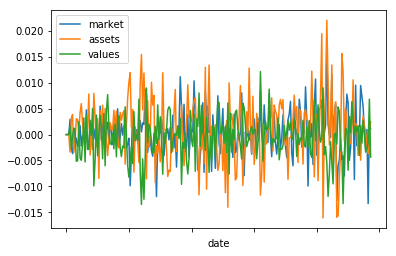

In [122]:
factor_rtn.plot()
plt.show()

直接看收益率，好像并没有什么规律，我们看看累积收益率的图呢：

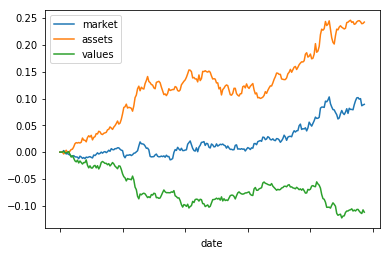

In [123]:
factor_rtn.cumsum().plot()
plt.show()

这样可以看出非常明显的规律，我们把行情图也画在下面：

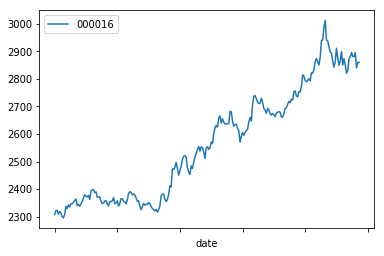

In [124]:
index_close.plot()
plt.show()

可以看出：
1. 市场因子的累积因子收益率明显和市场指数一致变化
2. 规模因子的累积因子收益率持续上升，说明大盘股的表现大幅超越小盘股。这和我们的认知相同，2017年是个去杠杆的年份，小市值股票表现不好。
3. 成长因子的累计因子收益率持续下降，说明经济不景气，成长股受到的影响较大，这也和我们的认知相同。

下面我们就来算算因子收益率的协方差矩阵：

In [125]:
print("因子协方差矩阵：")
factor_rtn_cov = factor_rtn.cov()
print(factor_rtn_cov)
print("因子相关系数矩阵：")
print(factor_rtn.corr())
print("股票协方差矩阵：")
beta_all = pd.DataFrame([beta_market.iloc[-1], beta_assets, beta_value], index=['market','assets', 'value'])
stock_rtn_cov = np.dot(np.dot(beta_all.T, factor_rtn.cov()), beta_all)
print(stock_rtn_cov)

因子协方差矩阵：
          market    assets    values
market  0.000019  0.000005  0.000001
assets  0.000005  0.000035 -0.000015
values  0.000001 -0.000015  0.000017
因子相关系数矩阵：
          market    assets    values
market  1.000000  0.185822  0.074119
assets  0.185822  1.000000 -0.625145
values  0.074119 -0.625145  1.000000
股票协方差矩阵：
[[ 3.05050453e-05 -3.63458562e-05  2.79682276e-05 ... -6.49349886e-06
  -2.19704230e-05  2.72764471e-06]
 [-3.63458562e-05  6.20933033e-05 -2.49975629e-05 ... -1.27638519e-05
   2.80189029e-05 -2.25261524e-05]
 [ 2.79682276e-05 -2.49975629e-05  2.96821224e-05 ... -1.72043151e-05
  -2.36474587e-05 -1.00043122e-05]
 ...
 [-6.49349886e-06 -1.27638519e-05 -1.72043151e-05 ...  3.71468204e-05
   2.93823451e-05  4.49593353e-05]
 [-2.19704230e-05  2.80189029e-05 -2.36474587e-05 ...  2.93823451e-05
   6.92836231e-05  4.50210920e-05]
 [ 2.72764471e-06 -2.25261524e-05 -1.00043122e-05 ...  4.49593353e-05
   4.50210920e-05  6.48558179e-05]]


为直观的看看股票间的相关关系，我们对协防差矩阵画热力图：

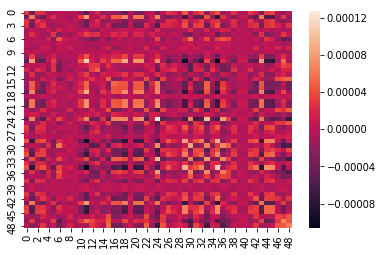

In [126]:
import seaborn as sns
sns.heatmap(stock_rtn_cov)
plt.show()

这里我们用到了一个包Seaborn，它是在matplotlib的基础上进行了更高级的API封装，从而使得作图更容易了。它给我们提供了很多非常不错的数据可视化方案。是值得学习的一个包。具体使用手册可参见：

http://seaborn.pydata.org/

以上，我们就成功的对股票风险建模了。 关于风险模型中的特异风险，涉及技巧较多，且方法多样， 业界并无孰优孰劣之定论，故我们暂且不作深入研究。

### 8.6.5 延伸阅读——怎样的风险预测模型是好的模型？

首先，如何定义风险，这就已经众说纷纭了。

从本质来看，风险就是对未来收益的不确定性的度量。
那既然未来收益是不确定的，那我们几乎可以把它看作一个随机变量。
那其实风险就是该随机变量的分布函数的度量。
一个随机变量的分布可以完全由它的无穷阶矩度量，
我们选取影响最大的一阶矩和二阶矩来考虑问题。
很明显，一阶矩就是收益，二阶矩度量风险是很合适的。

实际上，收益分布的方差是度量量风险的好指标。
其他度量风险的指标，相较之下，并不能提供太多的信息增量，
同时又增加了各式各样的弱点。
再者考虑到数学性质较好的还是方差，
所以，最终，绝大部分人都选择了方差作为风险的度量。

其它常用的还有：
1. 半方差
2. 目标半方差
3. 损失概率
4. 在险价值
这些就不再赘述。

那么怎样预测风险呢？即怎样预测未来的标准差呢？

早期，人们通过对行情的观察和统计分析，
发现波动率具有聚集的特征。
这意味着方差/标准差可以用时间序列这门学科中的工具来处理，
于是诞生了ARCH/GARCH及其衍生模型。
这虽然能对波动率进行部分的预测，
但仍然是远远不够的。
后来，人们逐渐从单因素模型和Fama-French三因子模型中体会到，
只要有了因子暴露，就可以从因子协方差矩阵推导出股票的协方差矩阵。
而同时，因子的协方差矩阵还相对容易得到。
这样，人们就逐渐开发出了多因子结构化模型。
以Barra为代表的风险模型逐渐诞生。

结构化风险模型线性的组合了多种风险因子，
这些风险因子大都具有较强的经济学解释，
能很好的解释风险模型的结果，让人不得不信服。
另外，对于因子不能解释的风险，又通过传统的数学方法来处理，
从理论上几乎做到了完美。

那实践中呢？模型是否比其他模型要好呢？
一些人用实际数据做了验证，将结构化风险模型和历史数据法、GARCH法做了比较。
用不同的模型站在t时刻预测t+1时刻的标准差，
统计1倍/2倍标准差之外的事件的发生频率。
由大数定律，频率会收敛到概率。
我们可以得出哪个模型对未来风险的预测更接近事实。

结果，实践中，当因子选得足够好时，
结构化风险模型的效果是远好于其他模型的。
这样，也坚定了人们使用这个模型的信念。

读者也可以自行设计实验来验证这点。

# 8.7 仓位优化

### 8.7.1 导言

在本节中，我们将利用股票的收益率预测和股票风险模型，实现股票组合权重的配置。

对于收益率预测模型和风险模型，我们将使用前文所述模型。
在这两部分中，基础的理论框架是完善的，也得到了业界的公认。
所以，处理方法大同小异。我们也展示了通用的方法。

而对于如何配置股票组合权重，学界虽有成熟的框架，
但无奈实践中却往往因为股票相关性过高，以致无法使用。
解决股票相关性过高的方法倒是有很多，但总还是莫衷一是。
到底什么方法最优，还是缺乏共识。

所以，我们在这里，选择一些常用的方法，一方面为读者展示业界在遇到困难时，解决问题的思路；一方面抛砖引玉，以期引发读者思考，找出更好的解决方案。

### 8.7.2 基础知识准备

那么首先，我们介绍一下学界的此问题的处理框架：
$$U = w^T R - \frac{\lambda}{2} w^T \Sigma w$$
其中，U是效用，w是各标的投资权重的列向量，
R是各标的预测收益率的列向量，$\Sigma$是标的间的协方差矩阵。

欲使效用最大化，则效用函数对权重的一阶导数应当等于0：
$$R - \lambda \Sigma w = 0$$
这样就算出了权重：
$$w = \frac{1}{\lambda} \Sigma^{-1} R$$
于是，理论上很完美的解决了问题。

关于$\lambda$，它是风险厌恶系数。在利用美股数据的实证研究中，我们了解到，美国投资者的风险厌恶系数在2-4之间。不过，我们并不严格选择一个风险厌恶系数，而通常用它来调节权重w的尺度。

实践中，R的估计往往不够准确，并没有什么办法来使之更准确，所以，我们更多的努力将放在：即使R不够准确，怎样使w受到的影响最小。
而更为糟糕的是，协方差矩阵$\Sigma$还往往不可逆。这带来的问题非常严重。究其原因，还是资产之间相关性太高。这个问题并不能通过算法来完全解决，但更好的算法总有帮助。在本章的最后一节中，我们也会介绍一些从其他角度解决问题的方案。总之，本章内容是建立在一个偏科学的框架下的一个偏工程的优化问题。

### 8.7.3 操作总览

本实验由以下几个步骤组成：
1. 步骤一：收益率预测因子的组合
2. 步骤二：计算理论上最优的股票仓位
3. 步骤三：调整理论上最优的股票仓位

### 8.7.4 操作流程

#### 8.7.4.0 准备工作

和前面的小节一样，本节的代码也是可以独立运行的，所以我们需要先做一些准备工作。在本节中，我们将进行完整的量化投资研究流程，所以，前面几节的内容，几乎都在我们的准备工作中。因此，本节的准备工作稍长。

##### 8.7.4.0.1 数据准备

首先我们导入包：

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import acf
from statsmodels import api

import tushare as ts

然后我们获取股票数据和上证50指数数据：

In [128]:
stock_list = ts.get_sz50s().code
stock_list = stock_list[stock_list != '601236']
stock_data = {}
for stock in stock_list:
    stock_data[stock] = ts.get_k_data(stock, start='2017-01-01', end='2017-12-31')
    
stock_fundemental = ts.get_stock_basics()
    
index_name = '000016'
index_data = ts.get_k_data(index_name, index=True, start='2017-01-01', end='2017-12-31')

C:\Users\huang\Anaconda3\lib\site-packages\tushare\stock\classifying.py:266: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


整理数据：

In [129]:
#整理股票数据
stock_0 = pd.DataFrame(index=index_data.date)
stock_na = pd.DataFrame(index=index_data.date)
stock_open = stock_0.copy()
stock_high = stock_0.copy()
stock_low = stock_0.copy()
stock_close = stock_0.copy()

for stock in stock_list:
    stock_0 = stock_0.join(pd.DataFrame(0.0, index=stock_data[stock].date, columns=[stock]))
    stock_na = stock_na.join(pd.DataFrame(stock_data[stock].open.isna().values, index=stock_data[stock].date, columns=[stock]))
    stock_open = stock_open.join(pd.DataFrame(stock_data[stock].open.values, index=stock_data[stock].date, columns=[stock]))
    stock_high = stock_high.join(pd.DataFrame(stock_data[stock].high.values, index=stock_data[stock].date, columns=[stock]))
    stock_low = stock_low.join(pd.DataFrame(stock_data[stock].low.values, index=stock_data[stock].date, columns=[stock]))
    stock_close = stock_close.join(pd.DataFrame(stock_data[stock].close.values, index=stock_data[stock].date, columns=[stock]))
    
stock_rtn = stock_0.copy()
for stock in stock_list:
    stock_rtn[stock] = stock_close[stock] / stock_close[stock].shift() - 1
stock_rtn = stock_rtn.fillna(0)

#整理指数数据
index_0 = pd.DataFrame(0.0, index=index_data.date, columns=[index_name])
index_open = pd.DataFrame(index_data.open.values, index=index_data.date, columns=[index_name])
index_high = pd.DataFrame(index_data.high.values, index=index_data.date, columns=[index_name])
index_low = pd.DataFrame(index_data.low.values, index=index_data.date, columns=[index_name])
index_close = pd.DataFrame(index_data.close.values, index=index_data.date, columns=[index_name])

index_rtn = index_close / index_close.shift() - 1
index_rtn = index_rtn.fillna(0)

#计算主动收益率
stock_active_rtn = stock_rtn - np.repeat(index_rtn.values, stock_rtn.columns.size, axis=1)
stock_active_rtn_std = stock_active_rtn.std()

##### 8.7.4.0.2 收益率预测模型准备

构造收益率预测模型：

In [130]:
#计算红三兵
def cal_rtn_predictor_r3s():
    #初始化返回值
    res = stock_0.copy().fillna(0)
    #计算每只股票的预测值
    for stock in stock_list:
        #计算每日的预测值
        for i in range(2, len(stock_0)):
            idx = list(range(i - 2, i + 1))      
            if stock_na[stock][idx].sum():
                #剔除近三日有停牌的股票
                res[stock][i] = 0.0
            else:
                o = stock_open[stock][idx].copy()
                c = stock_close[stock][idx].copy()
                h = stock_high[stock][idx].copy()
                l = stock_low[stock][idx].copy()
                r = stock_rtn[stock][idx].copy()
                os = o.shift(-1)
                #计算
                d = (r > 0).sum()
                #近三日中有两日以上上涨
                if d > 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os > o).sum() + (os < c).sum()
                    #计算惩罚函数
                    loss = (c / h - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看涨，预测收益率
                        res[stock][i] = 0.05 - loss
                #近三日中有两日以上没有上涨
                elif d < 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os < o).sum() + (os > c).sum()
                    #计算惩罚函数
                    loss = (c / l - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看跌，预测收益率
                        res[stock][i] = -0.05 + loss
    return res

#计算动量因子
def cal_rtn_predictor_ma():
    
    #计算均线
    def ma_calculator(data, n):
        res = data.copy()
        for i in range(1, n):
            res += data.shift(i)
        return res / n
    
    #计算动量因子
    stock_ma_excess = ma_calculator(stock_close, 3) / ma_calculator(stock_close, 13) - 1
    stock_ma_excess_quantile = stock_ma_excess.fillna(0.0).rank(axis=1) / (stock_list.size + 1)
    return stock_ma_excess_quantile.apply(stats.norm(0,1).ppf)

构造精炼收益预测的函数：

In [133]:
def cal_alpha(rtn_predictor, method):
    
    #计算自相关系数
    def cal_acf(rtn_predictor):
        acf_all = pd.Series(index=stock_list)
        for stock in stock_list:
            acf_all[stock] = acf(rtn_predictor[stock])[1]
        return acf_all.mean()

    #计算IC
    def cal_ic(rtn_predictor, n = 1):
        res = pd.Series((n), dtype=float)
        for i in range(n):
            res[i] = np.corrcoef(stock_active_rtn.shift(-i - 1).fillna(0.0).values.reshape(stock_active_rtn.size), rtn_predictor.values.reshape(rtn_predictor.size))[0,1]
        return res

    #计算衰减系数
    def cal_ac(rtn_predictor):
        ic = cal_ic(rtn_predictor, 60)
        ac = ic / ic.shift()
        ac[ac < 0] = 0
        ac[ac > 1] = 1
        return ac.mean()

    #计算时间尺度上的混合信号
    def cal_mix_predictor(rtn_predictor, af, ac):
        res = rtn_predictor.copy()
        for i in range(1, len(res)):
            res.iloc[i, :] = rtn_predictor.iloc[i, :] - af * rtn_predictor.iloc[i - 1, :] + ac * res.iloc[i - 1, :]
        return res
    
    #计算时间序列信号的精炼预测
    def cal_ts_alpha(rtn_predictor, ic):
        z = rtn_predictor / rtn_predictor.values.std()
        return np.repeat(np.array(stock_active_rtn_std).reshape(1, stock_rtn.columns.size), len(stock_rtn), axis=0) * ic * z
    
    #计算截面信号的精炼预测
    def cal_cs_alpha(rtn_predictor, ic):
        std_cs = rtn_predictor.std(axis = 1)
        z = rtn_predictor.fillna(0.0) / np.repeat(std_cs.values.reshape(std_cs.size, 1), stock_list.size, axis=1)
        z_omega = z / np.repeat(stock_active_rtn_std.values.reshape(1, stock_active_rtn_std.size), len(stock_active_rtn), axis=0)
        c = z_omega.fillna(1.0).values.std()
        return ic / c * z.fillna(0.0)

    
    #开始计算
    af = cal_acf(rtn_predictor)
    ic = cal_ic(rtn_predictor)[0]
    ac = cal_ac(rtn_predictor)
    rtn_mix_predictor = cal_mix_predictor(rtn_predictor, af, ac)
    
    if method == 'ts':
        #时间序列信号
        return cal_ts_alpha(rtn_mix_predictor, ic)
    elif method == 'cs':
        #截面信号
        return cal_cs_alpha(rtn_mix_predictor, ic)
    else:
        print('wrong method!')
        return rtn_predictor

计算收益率模型，获取精炼预测：

In [140]:
rtn_predictor_r3s = cal_rtn_predictor_r3s()
rtn_predictor_ma = cal_rtn_predictor_ma()

alpha_r3s = cal_alpha(rtn_predictor_r3s, 'ts')
alpha_ma = cal_alpha(rtn_predictor_ma, 'cs')

C:\Users\huang\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:476: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


##### 8.7.4.0.3 风险预测模型准备

我们先构造风险因子：

In [144]:
#构造市场因子
def cal_beta_market():
    
    #计算beta
    def cal_beta():
        
        #计算单股票的单日的beta
        def cal_beta_1s1d(stock, n):
            if n < 3:
                return 1.0
            elif n < 20:
                return stats.linregress(index_rtn[index_name][0:n - 1], stock_rtn[stock][0:n - 1]).slope
            else:
                return stats.linregress(index_rtn[index_name][n - 20:n - 1], stock_rtn[stock][n - 20:n - 1]).slope        

        
        #开始计算beta
        res = stock_0.copy()
        for stock in stock_list:
            for i in range(len(index_rtn)):
                res[stock][i] = cal_beta_1s1d(stock, i)
        return res
    
    
    #开始计算市场因子
    beta = cal_beta()
    beta_mean = np.repeat(beta.mean(axis=1).values.reshape(len(beta), 1), stock_list.size, axis=1)
    beta_std = np.repeat(beta.std(axis=1).values.reshape(len(beta),1), stock_list.size, axis=1)
    return (beta - beta_mean) / beta_std


#构造规模因子
def cal_beta_assets():
    stock_assets = stock_fundemental.totalAssets[stock_list]
    beta_assets = np.log(stock_assets)
    return (beta_assets - beta_assets.mean()) / beta_assets.std()


#构造成长因子
def cal_beta_value():
    stock_value = stock_fundemental.pe[stock_list]
    beta_value = np.log(np.log(stock_value))
    return (beta_value - beta_value.mean()) / beta_value.std()


#计算因子收益率
def cal_factor_rtn(beta_market, beta_assets, beta_value):
    res = stock_0.iloc[:,0:3].copy()
    res.columns = ['market', 'assets', 'values']
    for i in range(3, len(res)):
        Y = stock_rtn.iloc[i].values.copy()
        X = np.asarray([beta_market.iloc[i], beta_assets, beta_value]).T 
        res.iloc[i] = api.OLS(Y, X).fit().params
    return res

接下来，我们计算风险因子，并算出因子收益率，从而算出因子的协方差矩阵和股票的协方差矩阵：

In [145]:
beta_market = cal_beta_market()
beta_assets = cal_beta_assets()
beta_value = cal_beta_value()
beta_all = pd.DataFrame([beta_market.iloc[-1], beta_assets, beta_value], index=['market','assets', 'value'])
factor_rtn = cal_factor_rtn(beta_market, beta_assets, beta_value)
factor_rtn_cov = factor_rtn.cov()
stock_rtn_cov = np.dot(np.dot(beta_all.T, factor_rtn.cov()), beta_all)

有了以上准备工作，我们终于可以开始进入正题了：

#### 8.7.4.1 步骤一：收益率预测因子的组合

现在，我们需要把这两个预测因子融合成一个预测。
对于这类问题，基本的思路就是线性组合。
那么，问题转化为，如何求得一个权重，
使得两个预测因子的线性组合达到“最优”。

这个问题，定义不同意义上的“最优”自然会催生不同的算法。
我们选择其中一种相对简单的做法：
我们认为，两个因子的预测能力，应当是相差无几的。这点从两个因子的IC可以看出来，都在0.02左右。
此时，对于组合预测因子来说，与其考虑获得更高的收益风险比，
不如考虑更为重要东西——分散因子本身可能失效的风险。
基于这种理念，经过数学推导，最优的权重应当如下：
$$w = V^{-1}e$$
其中，w是各因子的权重，V是因子间相关系数，$e = (1, 1)^T$。

然后，再将w标准化即可。

那么，我们先来算算因子的协方差矩阵。我们先来计算最后一天的情形：

[[7.21151753e-11 4.12666396e-10]
 [4.12666396e-10 3.67086598e-08]]


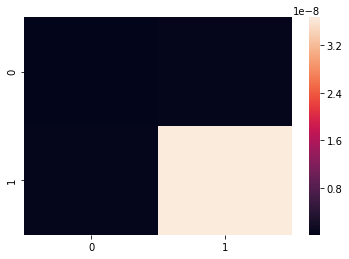

In [146]:
alpha_cov = np.cov(alpha_r3s.iloc[-1], alpha_ma.iloc[-1])
print(alpha_cov)
sns.heatmap(alpha_cov)
plt.show()

我们同样画出热力图，很明显，这个协方差矩阵是对角占优的，那么后面求逆时，应该问题不大。
我们接下来，计算次日两因子应具有的权重：

In [147]:
def cal_factor_weight_1d(cov):
    l = cov.shape[0]
    e = np.mat(np.repeat([1], l)).T
    w = np.mat(cov).I * e
    return w / w.sum()

print(cal_factor_weight_1d(alpha_cov))

[[ 1.00947148]
 [-0.00947148]]


接下来，我们计算每日两因子应具有的权重：

In [148]:
factor_weight = pd.DataFrame(0.5, index=index_0.index, columns=['r3s', 'ma'])
for i in range(12,len(factor_weight)):
    cov = np.cov(alpha_r3s.iloc[i], alpha_ma.iloc[i])
    factor_weight.iloc[i] = cal_factor_weight_1d(cov).T
print(factor_weight.tail())

                 r3s        ma
date                          
2017-12-25  1.013161 -0.013161
2017-12-26  1.007728 -0.007728
2017-12-27  0.994038  0.005962
2017-12-28  0.999946  0.000054
2017-12-29  1.009471 -0.009471


我们可以画一个权重随时间的变化图来看看：

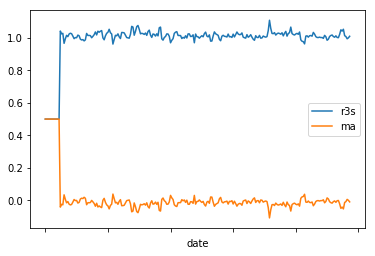

In [149]:
factor_weight.plot()
plt.show()

可以看出，大部分时候，权重都挺合理的。有个别时候出现权重大于一或小于零的情形。

接下来，我们把每天的因子权重乘到因子的精炼预测上，就可以得到每天对收益率的最终预测：

In [150]:
alpha_all = stock_0
for i in range(len(alpha_all)):
    alpha_all.iloc[i] = alpha_r3s.iloc[i] * factor_weight.r3s[i] + alpha_ma.iloc[i] * factor_weight.ma[i]
print(alpha_all.tail())

              600000        600009    600016    600028        600030  \
date                                                                   
2017-12-25  0.000002  5.545434e-06  0.000004  0.000038  3.580010e-06   
2017-12-26  0.000004  3.395798e-06  0.000002  0.000039  1.945950e-07   
2017-12-27  0.000004  2.109161e-06  0.000006  0.000024  3.005732e-07   
2017-12-28  0.000001  1.116813e-06  0.000006  0.000036  4.324974e-06   
2017-12-29  0.000001  5.107199e-07  0.000001  0.000010 -1.275141e-07   

                  600031    600036    600048        600050    600104  \
date                                                                   
2017-12-25  1.953195e-06  0.000012 -0.000006  3.600626e-06  0.000056   
2017-12-26 -1.881151e-06  0.000002 -0.000003  1.891745e-06  0.000008   
2017-12-27  2.641121e-06  0.000003  0.000003 -1.581103e-06  0.000005   
2017-12-28  1.046338e-07  0.000001  0.000004 -4.484275e-09  0.000003   
2017-12-29 -3.983820e-06  0.000002 -0.000003  1.642953e-06  0.0

我们选几只股票来画图看看，我们的最终预测是如何变化的：

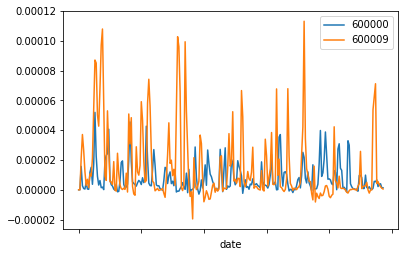

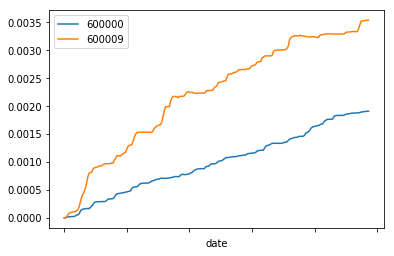

In [151]:
alpha_all.iloc[:,0:2].plot()
plt.show()
alpha_all.iloc[:,0:2].cumsum().plot()
plt.show()

这样，我们就完成了对收益率预测因子的组合。

#### 8.7.4.2 步骤二：计算理论上最优的股票仓位

现在，我们知道了股票的预测收益率和股票间的协方差矩阵， 我们几乎就能立刻算出股票的最优投资权重了：
$$w = \frac{1}{\lambda} \Sigma^{-1} R$$

In [152]:
stock_weight = pd.DataFrame(1.0 / 50, index=index_0.index, columns=stock_list)
for i in range(len(stock_weight)):
    w = np.mat(alpha_all.iloc[i].values) * np.mat(stock_rtn_cov).I
    stock_weight.iloc[i] = w / w.sum()
print(stock_weight.tail())

code          600000    600009    600016    600028    600030    600031  \
date                                                                     
2017-12-25 -0.199864  0.035380 -0.096610  0.075617  0.016804 -0.016455   
2017-12-26 -0.146410  0.004214 -0.082547  0.043608  0.029356 -0.004880   
2017-12-27 -0.144524  0.009357 -0.060150  0.030450 -0.026843  0.075103   
2017-12-28 -0.098851  0.029511 -0.048211  0.007346 -0.019787  0.105650   
2017-12-29 -0.272417  0.065556 -0.137705  0.114983  0.014462 -0.071667   

code          600036    600048    600050    600104    ...       601688  \
date                                                  ...                
2017-12-25 -0.249944  0.567976 -0.071817  0.565794    ...     0.054317   
2017-12-26 -0.209117  0.550298 -0.050642  0.495116    ...     0.069516   
2017-12-27 -0.170244  0.308989 -0.000879  0.519768    ...     0.084408   
2017-12-28 -0.102526  0.332963  0.009514  0.244079    ...     0.034005   
2017-12-29 -0.314160  0.548289 -0.100

C:\Users\huang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


我们选几只股票来看看它们的仓位是如何变动的：

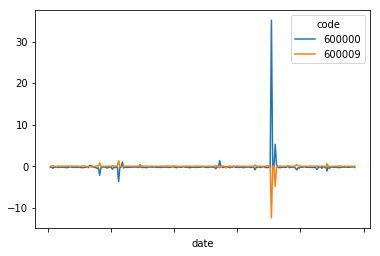

In [153]:
stock_weight.iloc[:,0:2].plot()
plt.show()

可以看出，仓位还是很不稳定，竟然出现融资30倍的情形。归根结底还是协方差矩阵的可逆性的问题。
我们画出最后一日各股票的仓位图看看：

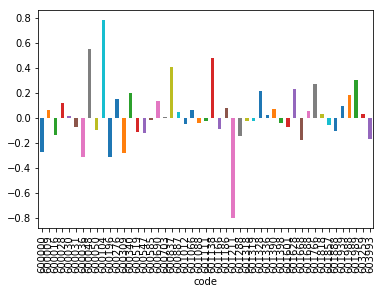

In [154]:
stock_weight.iloc[-1].plot(kind='bar')
plt.show()

负的非常多，可见，理论上最优的股票仓位，还是很有问题的。

#### 8.7.4.3 步骤三：调整理论上最优的股票仓位

那么接下来，我们对上述算法进行改进。

首先，我们来看看，如果R全都相等，是否有这个问题。这意味着，我们将采用和预测因子的组合相同的方法来处理股票组合。

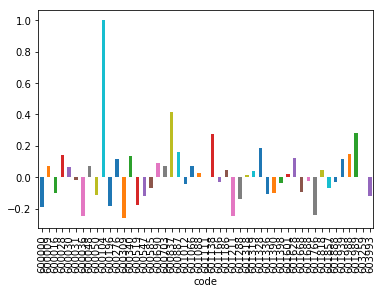

In [155]:
stock_weight_e = pd.DataFrame(1.0 / stock_list.size, index=index_0.index, columns=stock_list)
for i in range(len(stock_weight)):
    w = np.mat(np.repeat([1], stock_list.size)) * np.mat(stock_rtn_cov).I
    stock_weight_e.iloc[i] = w / w.sum()
stock_weight_e.iloc[-1].plot(kind='bar')
plt.show()

从图上看，问题有所好转，但也尚未根治。于是我们采取更有道理一点的做法：我们观察$\alpha$，把大于一定值的预测全部令为该值，否则记为0。这样，我们大大减小了收益预测的自由度，而且，也利用了其所包含的信息。我们先来看看$\alpha$的分布：

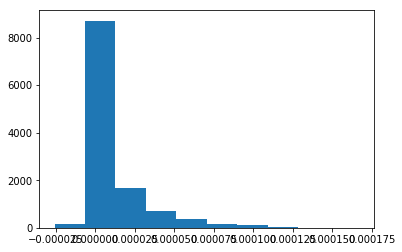

In [156]:
plt.hist(alpha_all.values.reshape(alpha_all.values.size, 1))
plt.show()

从图上看，我们大致可以0.00001为界：小于-0.00001的，就令为-0.00001，大于0.00001的，就令为0.00001，中间的记为0：

In [164]:
alpha_all_01 = (alpha_all >= 0.00001) * 0.00001 + (alpha_all <= -0.00001) * -0.00001
alpha_all_01 = alpha_all_01[alpha_all_01 != False].fillna(0.0)
print(alpha_all_01.tail())

            600000  600009  600016   600028  600030  600031   600036  600048  \
date                                                                           
2017-12-25     0.0     0.0     0.0  0.00001     0.0     0.0  0.00001     0.0   
2017-12-26     0.0     0.0     0.0  0.00001     0.0     0.0  0.00000     0.0   
2017-12-27     0.0     0.0     0.0  0.00001     0.0     0.0  0.00000     0.0   
2017-12-28     0.0     0.0     0.0  0.00001     0.0     0.0  0.00000     0.0   
2017-12-29     0.0     0.0     0.0  0.00000     0.0     0.0  0.00000     0.0   

            600050   600104   ...    601688  601766   601818   601857  \
date                          ...                                       
2017-12-25     0.0  0.00001   ...       0.0     0.0  0.00000  0.00001   
2017-12-26     0.0  0.00000   ...       0.0     0.0  0.00000  0.00001   
2017-12-27     0.0  0.00000   ...       0.0     0.0  0.00000  0.00001   
2017-12-28     0.0  0.00000   ...       0.0     0.0  0.00001  0.00001   
2

再来算算权重：

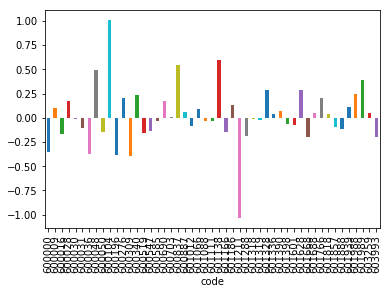

In [165]:
stock_weight_01 = pd.DataFrame(1.0 / stock_list.size, index=index_0.index, columns=stock_list)
for i in range(len(stock_weight_01)):
    w = np.mat(alpha_all_01.iloc[i].values) * np.mat(stock_rtn_cov).I
    if w.sum() != 0:
        stock_weight_01.iloc[i] = w / w.sum()
    else:
        pass
stock_weight_01.iloc[-1].plot(kind='bar')
plt.show()

看起来并无缓解，还是没能解决问题。无奈之下，我们只有使用流氓手段了，我们可以强行把仓位拉到1/50附近，这样，就很难在有负的持仓了。

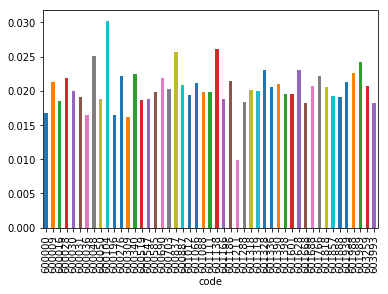

In [169]:
stock_weight_stable = stock_weight_01 * 0.01 + pd.DataFrame(1.0 / stock_list.size, index=index_0.index, columns=stock_list) * 0.99
stock_weight_stable.iloc[-1].plot(kind='bar')
plt.show()

上面的参数0.01和0.99纯属试出来的结果，并没有什么别的意义。但无论如何，我们总算得到了看起来还不错的股票仓位，也算解决了问题。
以上，我们就算从头到尾体验了量化投资的研究全过程。到这一步为止，我们已经得出了股票的仓位，可以直接用于交易了。
值得提醒的是，千万不要认为量化交易一定是程序化交易。
目前我国监管部门对股票市场的程序化交易时比较谨慎的，但对量化交易是持开放态度的。
我们完全可以用量化的方式得出股票的仓位，然后手工交易。这并不违背量化交易的本质。

同样，很多程序化交易其实就是简单规则的实现，反而算不上量化交易。在这一点上，希望读者能够辨明。

### 8.7.5 延伸阅读

#### 8.7.5.1 Black-Litterman 模型

前面我们实验中遇到的问题，即协方差矩阵的可逆性问题，多年前的量化投资研究员就遇到过。
在那时，为了解决这个问题，诞生了一个名为“Black-Litterman”模型的工具。
尽管，这个模型目前已经不流行了，但笔者认为了解它的思路仍然是有启发的，故在这里简单介绍一下。

它是由Fisher Black和Robert Litterman在1992年首先提出的，是基于金融行业对Markowitz模型数十年的研究和应用的基础上优化而来。
它的重点在于，我们先从股票的协方差矩阵和市场持仓（即市值）计算出市场对股票的一致预期收益。
然后把我们计算的$\alpha$和这个一直预期收益加权平均。当然，权重肯定是我们的预测较低，一般在2%到3%之间。
这是一种非常明显的贝叶斯统计的思路，把先验信息和新信息结合在一起了。
然后，再用后验的预期收益率和协方差矩阵的逆，得出我们的仓位。
这里还是用到了协方差矩阵的逆，那么为什么对可逆性问题的解决有帮助呢？

因为，如果正着不能求出逆，那么，我们可以用数值方法去优化，而在本模型中，由于我们的预测的权重远低于市场一致预期收益的权重，
这意味着，我们有一个很好的初值点——市场持仓。利用市场持仓作为初值点，运用数值方法去搜索最优持仓，往往能比较好的解决问题。

#### 8.7.5.2 处理海量资产时的另一种思路

前面提到的协方差矩阵的可逆性问题，归根结底是股票相关性较高的问题，也是因为我们有海量的股票造成的。
那么，如果我们的股票相关性较低呢？有没有办法使我们的股票相关性较低？

这催生了另一种思路，我们不要去预测股票，我们去预测一些股票组合。这些股票组合之间相关性可以做到较低。
我们推荐的《主动投资组合管理》的作者，格林纳德所在的基金，就采用了这种思路。

我们可以在做风险模型时，找出每个风险因子的因子组合——这个组合在该因子上暴露为1，而在其它因子上的暴露的平方和最小。
这个是可以做到的，并没有什么难度。然后，我们在做股票收益率预测模型时，不要预测股票收益率，而去预测风险因子的因子收益率。
这个理解起来可能有点混乱，我们需要去找一些收益预测因子，用它们去预测风险因子的因子收益率。然后，风险因子有自己的因子组合和协方差矩阵。
由于风险因子在设计时就考虑了底相关性的问题，所以，这里的协方差矩阵几乎一定可逆。这样，我们通过降维的方式，解决了这个问题。

这种方法目前并不主流，大概是因为我们的预测因子有很多是截面因子，而截面因子是预测股票收益率的，
而不能直接用于预测因子收益率，这会带了一些麻烦。不过，无论如何，这也是一种很好的思路。

#### 8.7.5.3 讨论：大类资产配置与股票组合权重配置的异同

在一个大型的基金中，大类资产配置非常重要，
他们的职位通常比基金经理高，
也往往需要更为敏锐的洞察力。
在这一领域，数学模型往往帮不上太多的忙，
只能在数据处理和可视化上，提供些许帮助。

导致这一问题的原因有二：
1. 大类资产之间，相关性较弱。
2. 大类资产的收益预测，更多依赖于对宏观政治经济的理解。

前者，我们前面对股票配置建模时，一个核心要素就是股票的协方差矩阵。
可是，大类资产间的相关系数矩阵接近单位矩阵。
这就导致了我们用同样的方法做配置，并没有什么用。

后者，一个有名的例子就是索罗斯，
他所开创的宏观对冲交易流派，
非常强调对各国的政治经济的非凡理解。
这样，数学模型可以施展的空间就更小了。

不过，这虽然很难，倒也无妨，
毕竟世界并不需要那么多智者来做大类资产配置。
在股票间做配置已经可以给我们提供足够的工作岗位了。

<div  style="color:black; width: 100%; border-top:2px #0f69b6 solid; height:40px;"> 
<span style="color:#0f69b6; padding-left:10px; padding-top:10px;  float:left">第 8 章</span>
<span style="color:#0f69b6;  float:right; text-align: right; padding-right:10px; padding-top:10px;">西南财经大学</span>
</div>